In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file 
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking the columns in the csv file 
print('No. of columns =',len(df.columns))
df.columns

No. of columns = 81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

SalePrice is considered as the target variable for predcition

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Finding columns with huge amount of null values 
df.columns[df.isnull().sum()>700]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
q = []
for i in df.columns:
    if 0 in df[i].unique():
        x = df[i][df[i]==0].value_counts()[0]
        print(i,', No. of null values',x)
        if x > 1100:
            q.append(i)
print(q)

MasVnrArea , No. of null values 861
BsmtFinSF1 , No. of null values 467
BsmtFinSF2 , No. of null values 1293
BsmtUnfSF , No. of null values 118
TotalBsmtSF , No. of null values 37
2ndFlrSF , No. of null values 829
LowQualFinSF , No. of null values 1434
BsmtFullBath , No. of null values 856
BsmtHalfBath , No. of null values 1378
FullBath , No. of null values 9
HalfBath , No. of null values 913
BedroomAbvGr , No. of null values 6
KitchenAbvGr , No. of null values 1
Fireplaces , No. of null values 690
GarageCars , No. of null values 81
GarageArea , No. of null values 81
WoodDeckSF , No. of null values 761
OpenPorchSF , No. of null values 656
EnclosedPorch , No. of null values 1252
3SsnPorch , No. of null values 1436
ScreenPorch , No. of null values 1344
PoolArea , No. of null values 1453
MiscVal , No. of null values 1408
['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [8]:
# Dropping columns with too many null values 
#'LowQualFinSF' is dropped as most of its values are 0
#'BsmtHalfBath' is dropped as most of its values are 0
#'EnclosedPorch' is dropped as most of its values are 0
#'3SsnPorch' is dropped as most of its values are 0
#'BsmtFinSF2' is dropped as most of its values are 0
#'ID' is dropped as it is same as index 
df = df.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1)

In [9]:
#Counting number of columns after removing the null columns 
print('No. of columns after removing =',len(df.columns))

No. of columns after removing = 68


In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,567.240411,...,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,441.866955,...,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,...,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [11]:
df.isnull().sum(axis=1).value_counts()

1     677
0     583
2      83
6      81
5      13
7      10
3       6
11      6
10      1
dtype: int64

### Modifying and removing un-necessary data 

In [12]:
# converting MsSubclass to string values so that it makes sense while making dummy variable
df['MSSubClass'] = df['MSSubClass'].map({20:'1-story 1946-new',30:'Others',40:'Others',45:'Others',50:'1.5 finished',60:'2-story 1946-new',70:'Others',75:'Others',
                                         80:'Others',85:'Others',90:'Others',150:'Others',160:'Others',180:'Others',190:'Others'})

In [13]:
# converting to string values so that it makes sense while making dummy variable
df['OverallQual'] = df['OverallQual'].map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor',})

In [14]:
# converting to string values so that it makes sense while making dummy variable
df['OverallCond'] = df['OverallCond'].map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',
                                           6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor',})

In [15]:
# Since 2&3 fireplaces are not that common, we can convert this into a concern of whether fireplace exists or not 
df['Fireplaces'] = df['Fireplaces'].map({0:0,1:1,2:1,3:1})

In [16]:
# Changing YearBuilt into categorical variable 
df['YearBuilt_range'] = pd.qcut(df['YearBuilt'],[0, .25, .5, .75, 1.],
                                labels=['Before 1954','1954-1973','1973-2000','2000-2010'],duplicates = 'drop')

In [17]:
df = df.drop(['YearBuilt'],axis=1)
df['YearBuilt_range'].value_counts()

Before 1954    385
2000-2010      364
1973-2000      356
1954-1973      355
Name: YearBuilt_range, dtype: int64

In [18]:
# Changing YearRemodAdd into categorical variable 
df['YearRemodAdd_range'] = pd.qcut(df['YearRemodAdd'],[0, .25, .5, .75, 1.],
                                   labels=['Before 1967','1967 - 1994','1994 - 2004','2004-2010'],
                                   duplicates = 'drop')

In [19]:
df = df.drop(['YearRemodAdd'],axis=1)
df['YearRemodAdd_range'].value_counts()

1994 - 2004    395
Before 1967    376
1967 - 1994    374
2004-2010      315
Name: YearRemodAdd_range, dtype: int64

In [20]:
# Changing YearRemodAdd into categorical variable 
df['GarageYrBlt_range'] = pd.qcut(df['GarageYrBlt'],[0, .25, .5, .75, 1.],
                                  labels=['Before 1961','1961 - 1980','1980 - 2002','2002-2010'],
                                  duplicates = 'drop')

In [21]:
df = df.drop(['GarageYrBlt'],axis=1)
df['GarageYrBlt_range'].value_counts()

1961 - 1980    354
1980 - 2002    349
Before 1961    347
2002-2010      329
Name: GarageYrBlt_range, dtype: int64

In [22]:
# Converting moth sold to quarters for easier understanding 
df['MoSold'] = df['MoSold'].map({1:'1st Quarter',2:'1st Quarter',3:'1st Quarter',4:'2nd Quarter',5:'2nd Quarter',
                                 6:'2nd Quarter',7:'3rd Quarter',8:'3rd Quarter',9:'3rd Quarter',10:'4th Quarter',
                                 11:'4th Quarter',12:'4th Quarter'})

In [23]:
# Since more than 75% values in 'MSZoning' are RL , we can make it into RL and not RL 
df['MSZoning'] = df['MSZoning'].map({'RL':'RL', 'RM':'Others', 'C (all)':'Others', 'FV':'Others', 'RH':'Others'})

In [24]:
#Since most values are regular and irregular1 , combining IR1,IR2 and IR3 to make one value 'Irreg' for iregular
df['LotShape'] = df['LotShape'].map({'Reg':'Reg', 'IR1':'Irreg', 'IR2':'Irreg', 'IR3':'Irreg'})

In [25]:
print(df['LandContour'].value_counts())
# since almost 100% of values are same, the column will not have any effect on the final model 
df = df.drop(['LandContour'],axis=1)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


In [26]:
print(df['Utilities'].value_counts())
# since almost 100% of Utilities values are same, the column will not have any effect on the final model 
df = df.drop(['Utilities'],axis=1)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [27]:
# More than 70% of 'LotConfig' are inside lots. The rest constitues very small proportion 
# So a combination of the others may show an impact on the model 
df['LotConfig'] = df['LotConfig'].map({'Inside':'Inside', 'FR2':'Others', 'Corner':'Others', 'CulDSac':'Others', 
                                       'FR3':'Others'})

In [28]:
print(df['LandSlope'].value_counts())
# since almost 100% of values are same, the column will not have any effect on the final model 
df = df.drop(['LandSlope'],axis=1)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


In [29]:
print(df['Street'].value_counts())
# since almost 100% of values are same, the column will not have any effect on the final model 
df = df.drop(['Street'],axis=1)

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [30]:
print(df['Condition1'].value_counts())
# since more than 80% of values are same, the column will not have any effect on the final model 
df = df.drop(['Condition1'],axis=1)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


In [31]:
print(df['Condition2'].value_counts())
# since more than 90% of values are same, the column will not have any effect on the final model 
df = df.drop(['Condition2'],axis=1)

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


In [32]:
print(df['BldgType'].value_counts())
# since more than 80% of values are same, the column will not have any effect on the final model 
df = df.drop(['BldgType'],axis=1)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


In [33]:
# Since most houses belongs to '2Story', '1Story', '1.5Fin' these categories, 
# other categories are combined so that they have some effect on the model 
df['HouseStyle'] = df['HouseStyle'].map({'2Story':'2Story', '1Story':'1Story', '1.5Fin':'1.5Fin', '1.5Unf':'Others', 
                                         'SFoyer':'Others', 'SLvl':'Others', '2.5Unf':'Others','2.5Fin':'Others'})

In [34]:
# No. of sections are reduced so that there will be lesser varibales to consider while making dummy varibales 
df['OverallQual'] = df['OverallQual'].map({'Good':'Good', 'Above Average':'Above Average', 'Very Good':'Very Good',
                                           'Average':'Average', 'Excellent':'Very Good','Below Average':'Below Average', 
                                           'Very Excellent':'Very Good', 'Fair':'Below Average', 'Very Poor':'Below Average', 
                                           'Poor':'Below Average'})

In [35]:
# No. of sections are reduced so that there will be lesser varibales to consider while making dummy varibales 
df['OverallCond'] = df['OverallCond'].map({'Good':'Good', 'Above Average':'Above Average', 'Very Good':'Very Good', 
                                           'Average':'Average', 'Excellent':'Very Good','Below Average':'Below Average',
                                           'Fair':'Below Average', 'Very Poor':'Below Average', 'Poor':'Below Average'})

In [36]:
# Since most values are gable, the rest are replaced with 'others' so that they may have some effect on the model 
df['RoofStyle'] = df['RoofStyle'].map({'Gable':'Gable', 'Hip':'Others', 'Gambrel':'Others',
                                       'Mansard':'Others', 'Flat':'Others', 'Shed':'Others'})

In [37]:
print(df['RoofMatl'].value_counts())
# since more than 90% of values are same, the column will not have any effect on the final model 
df = df.drop(['RoofMatl'],axis=1)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64


In [38]:
# Since most values are in 'VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood' , 
# the rest are replaced with 'others' so that they may have some effect on the model
df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':'VinylSd', 'MetalSd':'MetalSd', 'Wd Sdng':'Wd Sdng', 'HdBoard':'HdBoard', 
                       'BrkFace':'Others', 'WdShing':'Others','CemntBd':'Others', 'Plywood':'Plywood', 
                       'AsbShng':'Others', 'Stucco':'Others', 'BrkComm':'Others', 'AsphShn':'Others',
       'Stone':'Others', 'ImStucc':'Others', 'CBlock':'Others'})

In [39]:
# Since most values are in 'VinylSd', 'MetalSd', 'HdBoard', 'Plywood', 'Wd Sdng' , the rest are replaced with 'others' 
# so that they may have some effect on the model
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':'VinylSd', 'MetalSd':'MetalSd', 'Wd Shng':'Others', 'HdBoard':'HdBoard',
                                           'Plywood':'Plywood', 'Wd Sdng':'Wd Sdng','CmentBd':'Others', 'BrkFace':'Others', 
                                           'Stucco':'Others','AsbShng':'Others', 'Brk Cmn':'Others', 'ImStucc':'Others',
                                           'AsphShn':'Others', 'Stone':'Others', 'Other':'Others', 'CBlock':'Others'})

In [40]:
# Both BrkFace and BrkCmn values are combined to one single entity Brick 
df['MasVnrType']=df['MasVnrType'].map({'BrkFace':'Brick', 'None':'None', 'Stone':'Stone', 'BrkCmn':'Brick'})

In [41]:
# EX and Fa are very low in numbers so they are combined with other two claues so that they are included in the model 
df['ExterQual'] = df['ExterQual'].map({'Gd':'Gd', 'TA':'TA', 'Ex':'Gd', 'Fa':'TA'})

In [42]:
print(df['ExterCond'].value_counts())
# since more than 90% of values are same, the column will not have any effect on the final model 
df = df.drop(['ExterCond'],axis=1)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


In [43]:
# Others constitute a small portion with BrkTil,Slab, Stone and Wood 
df['Foundation'] = df['Foundation'].map({'PConc':'PConc', 'CBlock':'CBlock', 'BrkTil':'Others', 'Wood':'Others',
                                         'Slab':'Others', 'Stone':'Others'})

In [44]:
# Fa is added to TA since its very small in number
df['BsmtQual']=df['BsmtQual'].map({'Gd':'Gd', 'TA':'TA', 'Ex':'Ex','Fa':'TA'})

In [45]:
print(df['BsmtCond'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['BsmtCond'],axis=1)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [46]:
# It is transformed to whether exposure is there or not as majority constitutes no exposure 
df['BsmtExposure'] = df['BsmtExposure'].map({'No':'No', 'Gd':'Yes', 'Mn':'Yes', 'Av':'Yes'})

In [47]:
# Some varibales are combined to reduce dummy varibales 
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ':'GLQ', 'ALQ':'ALQ', 'Unf':'Unf', 'Rec':'ALQ', 'BLQ':'BLQ','LwQ':'BLQ'})

In [48]:
print(df['BsmtFinType2'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['BsmtFinType2'],axis=1)

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [49]:
print(df['Heating'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['Heating'],axis=1)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [50]:
print(df['CentralAir'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['CentralAir'],axis=1)

Y    1365
N      95
Name: CentralAir, dtype: int64


In [51]:
print(df['Electrical'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['Electrical'],axis=1)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [52]:
print(df['Functional'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['Functional'],axis=1)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [53]:
print(df['GarageQual'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['GarageQual'],axis=1)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [54]:
print(df['GarageCond'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['GarageCond'],axis=1)

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [55]:
print(df['PavedDrive'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['PavedDrive'],axis=1)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


In [56]:
print(df['SaleType'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['SaleType'],axis=1)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


In [57]:
print(df['SaleCondition'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['SaleCondition'],axis=1)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [58]:
# Since Fa and Po values are very low in number , they are combined with TA so that these values are added to the model 
df['HeatingQC'] = df['HeatingQC'].map({'Ex':'Ex', 'Gd':'Gd', 'TA':'TA', 'Fa':'TA', 'Po':'TA'})

In [59]:
# Fa and TA are combined since the values for Fa are small 
df['KitchenQual'] = df['KitchenQual'].map({'Gd':'Gd', 'TA':'TA', 'Ex':'Ex', 'Fa':'TA'})

In [60]:
print(df['FireplaceQu'].value_counts())
# since more than 50% null values 
df = df.drop(['FireplaceQu'],axis=1)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [61]:
# Very low values are combined with other values so that lesser dummy variables are formed 
df['GarageType'] = df['GarageType'].map({'Attchd':'Attchd', 'Detchd':'Others', 'BuiltIn':'Others', 
                                         'CarPort':'Others','Basment':'Others', '2Types':'Others'})

In [62]:
# Very low values are combined with other values so that lesser dummy variables are formed 
df['OverallCond'] = df['OverallCond'].map({'Average':'Average', 'Very Good':'Good', 'Above Average':'Above Average', 
                       'Good':'Good', 'Below Average':'Average'})

In [63]:
print(df['KitchenAbvGr'].value_counts())
# since more than 80-90% of values are same, the column will not have any effect on the final model 
df = df.drop(['KitchenAbvGr'],axis=1)

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [64]:
# Converted to char to make dummy variable 
df['YrSold'] = df['YrSold'].map({2008:'2008', 2007:'2007', 2006:'2006', 2009:'2009', 2010:'2010'})

In [65]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [66]:
# replacing Null values 
df['LotFrontage'].fillna(df['LotFrontage'].median(skipna=True),inplace=True)

In [67]:
# replacing Null values 
df['MSSubClass'].fillna(value='1-story 1946-new',inplace=True)

In [68]:
# replacing Null values 
df['MasVnrType'].fillna(value='None',inplace=True)

In [69]:
# replacing Null values 
df['MasVnrArea'].fillna(df['MasVnrArea'].median(skipna=True),inplace=True)

In [70]:
# replacing Null values 
df['BsmtQual'].fillna(value='TA',inplace=True)

In [71]:
# replacing Null values 
df['BsmtExposure'].fillna(value='No',inplace=True)

In [72]:
# replacing Null values 
df['BsmtFinType1'].fillna(value='Unf',inplace=True)

In [73]:
# replacing Null values 
df['GarageType'].fillna(value='Attchd',inplace=True)

In [74]:
# replacing Null values 
df['GarageFinish'].fillna(value='Unf',inplace=True)

In [75]:
# replacing Null values 
df['GarageYrBlt_range'].fillna(value='1961 - 1980',inplace=True)

In [76]:
df.select_dtypes(include=['float64']).columns

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [77]:
df.select_dtypes(include=['int64']).columns

Index(['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [78]:
# Finding datatypes with string values to be converted into 
df.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'MoSold', 'YrSold'],
      dtype='object')

In [79]:
# Finding datatypes with string values to be converted into 
df.select_dtypes(include=['category']).columns

Index(['YearBuilt_range', 'YearRemodAdd_range', 'GarageYrBlt_range'], dtype='object')

In [80]:
len(df.columns)

46

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   object  
 1   MSZoning            1460 non-null   object  
 2   LotFrontage         1460 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   LotShape            1460 non-null   object  
 5   LotConfig           1460 non-null   object  
 6   Neighborhood        1460 non-null   object  
 7   HouseStyle          1460 non-null   object  
 8   OverallQual         1460 non-null   object  
 9   OverallCond         1460 non-null   object  
 10  RoofStyle           1460 non-null   object  
 11  Exterior1st         1460 non-null   object  
 12  Exterior2nd         1460 non-null   object  
 13  MasVnrType          1460 non-null   object  
 14  MasVnrArea          1460 non-null   float64 
 15  ExterQual           1460 non-null   ob

### Finding the outliers in target variable 

In [82]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

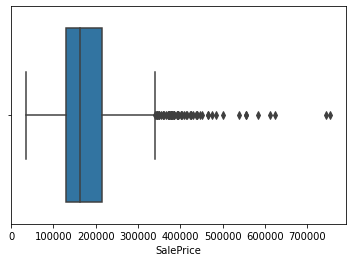

In [83]:
sns.boxplot(df['SalePrice'])

In [84]:
np.percentile(df['SalePrice'],90)

278000.0

In [85]:
# Removing values which are higher than 90th percetile of SalePrice 
df = df[df['SalePrice']<=278000]

## Seperating Target variable and prediction variables 

In [86]:
# Traget Variable 
Y = df.pop('SalePrice')
#Prediction 
X = df

In [87]:
len(X.columns)

45

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1315 non-null   object  
 1   MSZoning            1315 non-null   object  
 2   LotFrontage         1315 non-null   float64 
 3   LotArea             1315 non-null   int64   
 4   LotShape            1315 non-null   object  
 5   LotConfig           1315 non-null   object  
 6   Neighborhood        1315 non-null   object  
 7   HouseStyle          1315 non-null   object  
 8   OverallQual         1315 non-null   object  
 9   OverallCond         1315 non-null   object  
 10  RoofStyle           1315 non-null   object  
 11  Exterior1st         1315 non-null   object  
 12  Exterior2nd         1315 non-null   object  
 13  MasVnrType          1315 non-null   object  
 14  MasVnrArea          1315 non-null   float64 
 15  ExterQual           1315 non-null   ob

## Checking linearity with different parameters 

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

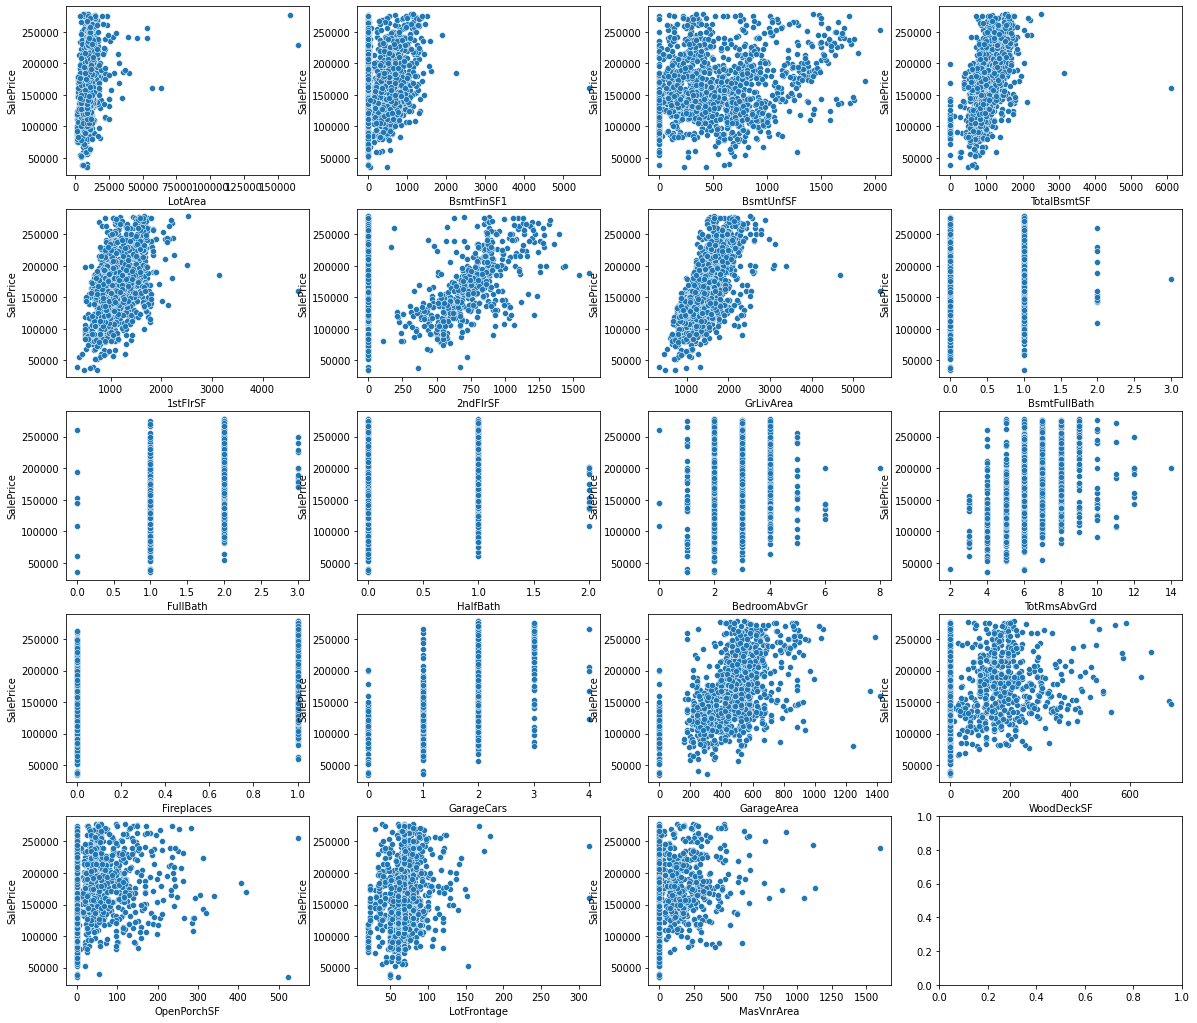

In [89]:
fig,axes = plt.subplots(5,4,figsize = (20,18))
sns.scatterplot(x=df['LotArea'],y=Y,ax = axes[0,0])
sns.scatterplot(x=df['BsmtFinSF1'],y=Y,ax = axes[0,1])
sns.scatterplot(x=df['BsmtUnfSF'],y=Y,ax = axes[0,2])
sns.scatterplot(x=df['TotalBsmtSF'],y=Y,ax = axes[0,3])
sns.scatterplot(x=df['1stFlrSF'],y=Y,ax = axes[1,0])
sns.scatterplot(x=df['2ndFlrSF'],y=Y,ax = axes[1,1])
sns.scatterplot(x=df['GrLivArea'],y=Y,ax = axes[1,2])
sns.scatterplot(x=df['BsmtFullBath'],y=Y,ax = axes[1,3])
sns.scatterplot(x=df['FullBath'],y=Y,ax = axes[2,0])
sns.scatterplot(x=df['HalfBath'],y=Y,ax = axes[2,1])
sns.scatterplot(x=df['BedroomAbvGr'],y=Y,ax = axes[2,2])
sns.scatterplot(x=df['TotRmsAbvGrd'],y=Y,ax = axes[2,3])
sns.scatterplot(x=df['Fireplaces'],y=Y,ax = axes[3,0])
sns.scatterplot(x=df['GarageCars'],y=Y,ax = axes[3,1])
sns.scatterplot(x=df['GarageArea'],y=Y,ax = axes[3,2])
sns.scatterplot(x=df['WoodDeckSF'],y=Y,ax = axes[3,3])
sns.scatterplot(x=df['OpenPorchSF'],y=Y,ax = axes[4,0])
sns.scatterplot(x=df['LotFrontage'],y=Y,ax = axes[4,1])
sns.scatterplot(x=df['MasVnrArea'],y=Y,ax = axes[4,2])

##### From the above graph we can see that many values are having linear relation with sales price 

## Finding relation bw Salesprice and categorical values 

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

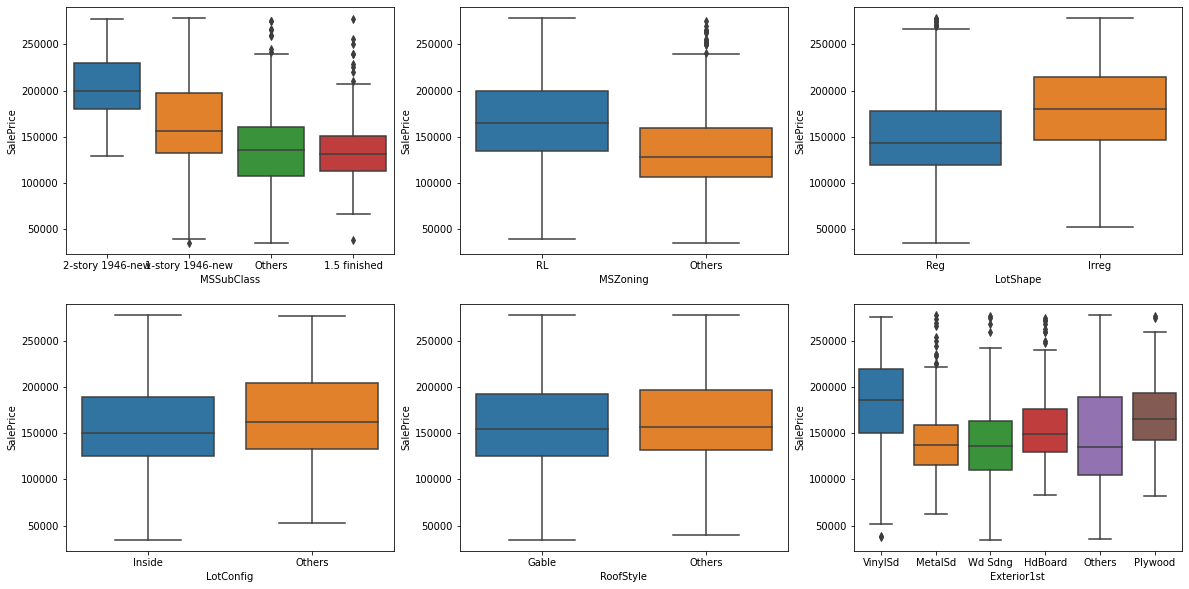

In [90]:
fig,axes = plt.subplots(2,3,figsize = (20,10))
sns.boxplot(x=df['MSSubClass'],y=Y,ax = axes[0,0])
sns.boxplot(x=df['MSZoning'],y=Y,ax = axes[0,1])
sns.boxplot(x=df['LotShape'],y=Y,ax = axes[0,2])
sns.boxplot(x=df['LotConfig'],y=Y,ax = axes[1,0])
sns.boxplot(x=df['RoofStyle'],y=Y,ax = axes[1,1])
sns.boxplot(x=df['Exterior1st'],y=Y,ax = axes[1,2])

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

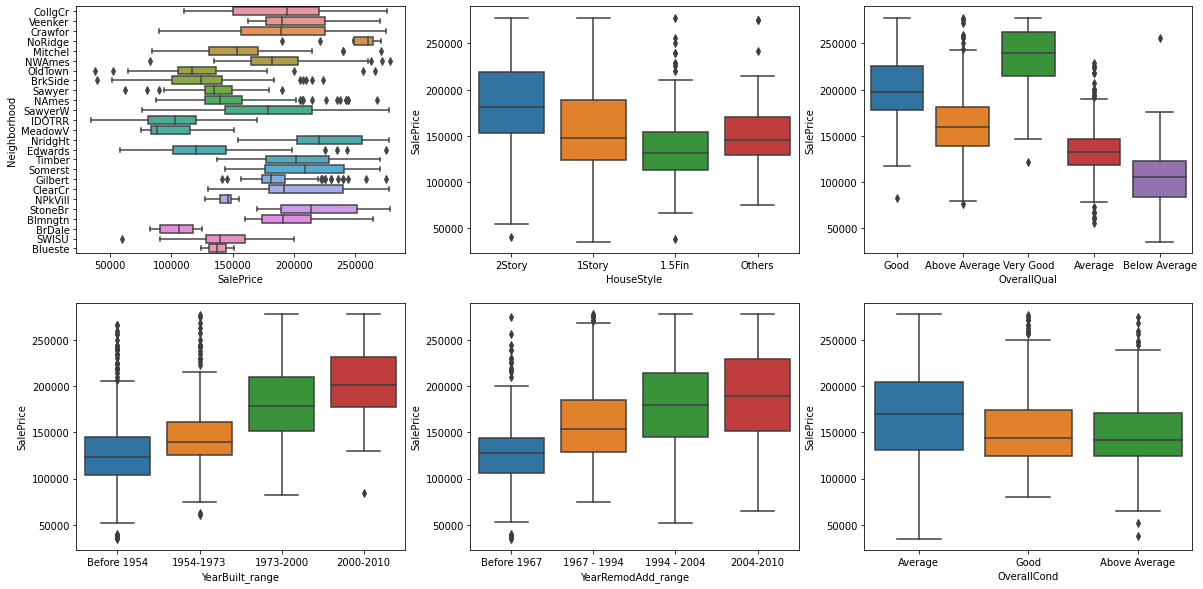

In [91]:
fig,axes = plt.subplots(2,3,figsize = (20,10))
sns.boxplot(y=df['Neighborhood'],x=Y,ax = axes[0,0])
sns.boxplot(x=df['HouseStyle'],y=Y,ax = axes[0,1])
sns.boxplot(x=df['OverallQual'],y=Y,ax = axes[0,2])
sns.boxplot(x=df['YearBuilt_range'],y=Y,ax = axes[1,0])
sns.boxplot(x=df['YearRemodAdd_range'],y=Y,ax = axes[1,1])
sns.boxplot(x=df['OverallCond'],y=Y,ax = axes[1,2])

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

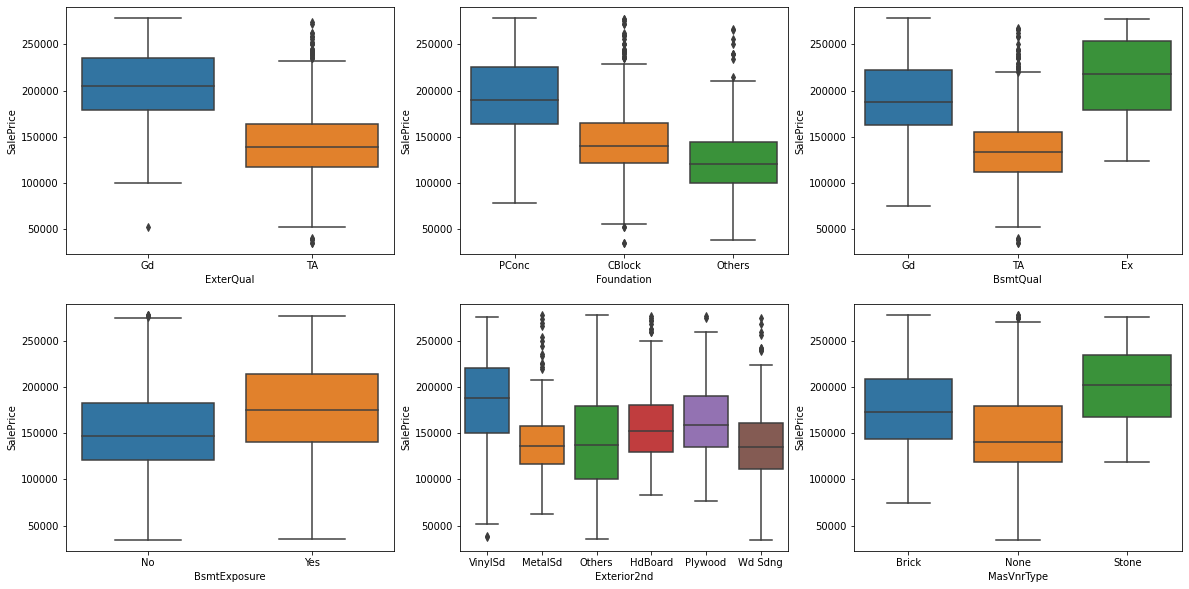

In [92]:
fig,axes = plt.subplots(2,3,figsize = (20,10))
sns.boxplot(x=df['ExterQual'],y=Y,ax = axes[0,0])
sns.boxplot(x=df['Foundation'],y=Y,ax = axes[0,1])
sns.boxplot(x=df['BsmtQual'],y=Y,ax = axes[0,2])
sns.boxplot(x=df['BsmtExposure'],y=Y,ax = axes[1,0])
sns.boxplot(x=df['Exterior2nd'],y=Y,ax = axes[1,1])
sns.boxplot(x=df['MasVnrType'],y=Y,ax = axes[1,2])

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

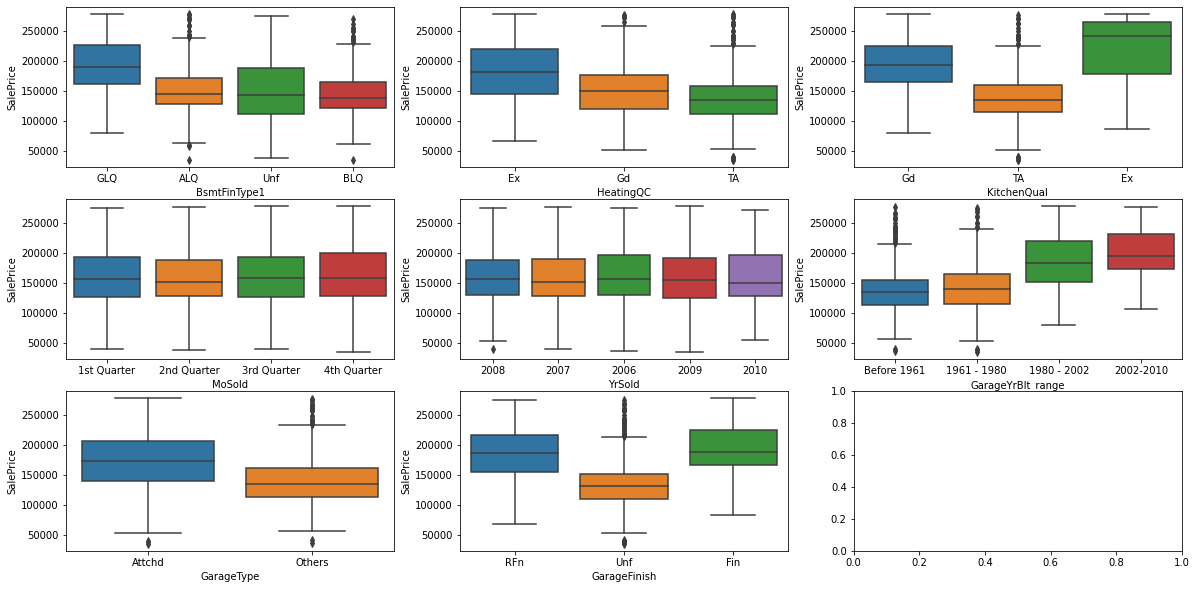

In [93]:
fig,axes = plt.subplots(3,3,figsize = (20,10))
sns.boxplot(x=df['BsmtFinType1'],y=Y,ax = axes[0,0])
sns.boxplot(x=df['HeatingQC'],y=Y,ax = axes[0,1])
sns.boxplot(x=df['KitchenQual'],y=Y,ax = axes[0,2])
sns.boxplot(x=df['MoSold'],y=Y,ax = axes[1,0])
sns.boxplot(x=df['YrSold'],y=Y,ax = axes[1,1])
sns.boxplot(x=df['GarageYrBlt_range'],y=Y,ax = axes[1,2])
sns.boxplot(x=df['GarageType'],y=Y,ax = axes[2,0])
sns.boxplot(x=df['GarageFinish'],y=Y,ax = axes[2,1])

### Creating dummy variables 

In [94]:
# List of categorical variables 
dummy = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'MoSold', 'YrSold','YearBuilt_range', 
 'YearRemodAdd_range', 'GarageYrBlt_range']

In [95]:
X[dummy]

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,...,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,MoSold,YrSold,YearBuilt_range,YearRemodAdd_range,GarageYrBlt_range
0,2-story 1946-new,RL,Reg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,...,GLQ,Ex,Gd,Attchd,RFn,1st Quarter,2008,2000-2010,1994 - 2004,2002-2010
1,1-story 1946-new,RL,Reg,Others,Veenker,1Story,Above Average,Good,Gable,MetalSd,...,ALQ,Ex,TA,Attchd,RFn,2nd Quarter,2007,1973-2000,1967 - 1994,1961 - 1980
2,2-story 1946-new,RL,Irreg,Inside,CollgCr,2Story,Good,Average,Gable,VinylSd,...,GLQ,Ex,Gd,Attchd,RFn,3rd Quarter,2008,2000-2010,1994 - 2004,1980 - 2002
3,Others,RL,Irreg,Others,Crawfor,2Story,Good,Average,Gable,Wd Sdng,...,ALQ,Gd,Gd,Others,Unf,1st Quarter,2006,Before 1954,1967 - 1994,1980 - 2002
4,2-story 1946-new,RL,Irreg,Others,NoRidge,2Story,Very Good,Average,Gable,VinylSd,...,GLQ,Ex,Gd,Attchd,RFn,4th Quarter,2008,1973-2000,1994 - 2004,1980 - 2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-story 1946-new,RL,Reg,Inside,Gilbert,2Story,Above Average,Average,Gable,VinylSd,...,Unf,Ex,TA,Attchd,RFn,3rd Quarter,2007,1973-2000,1994 - 2004,1980 - 2002
1456,1-story 1946-new,RL,Reg,Inside,NWAmes,1Story,Above Average,Above Average,Gable,Plywood,...,ALQ,TA,TA,Attchd,Unf,1st Quarter,2010,1973-2000,1967 - 1994,1961 - 1980
1457,Others,RL,Reg,Inside,Crawfor,2Story,Good,Good,Gable,Others,...,GLQ,Ex,Gd,Attchd,RFn,2nd Quarter,2010,Before 1954,2004-2010,Before 1961
1458,1-story 1946-new,RL,Reg,Inside,NAmes,1Story,Average,Above Average,Others,MetalSd,...,GLQ,Gd,Gd,Attchd,Unf,2nd Quarter,2010,Before 1954,1994 - 2004,Before 1961


In [96]:
# For loop for creating dummies 
# X - dataframe with predictor variables

for i in dummy:
    d = pd.get_dummies(X[i],prefix=i,drop_first=True)
    X =pd.concat((X,d),axis=1)
    X = X.drop(i,axis=1)
    

In [97]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,YrSold_2010,YearBuilt_range_1954-1973,YearBuilt_range_1973-2000,YearBuilt_range_2000-2010,YearRemodAdd_range_1967 - 1994,YearRemodAdd_range_1994 - 2004,YearRemodAdd_range_2004-2010,GarageYrBlt_range_1961 - 1980,GarageYrBlt_range_1980 - 2002,GarageYrBlt_range_2002-2010
0,65.0,8450,196.0,706,150,856,856,854,1710,1,...,0,0,0,1,0,1,0,0,0,1
1,80.0,9600,0.0,978,284,1262,1262,0,1262,0,...,0,0,1,0,1,0,0,1,0,0
2,68.0,11250,162.0,486,434,920,920,866,1786,1,...,0,0,0,1,0,1,0,0,1,0
3,60.0,9550,0.0,216,540,756,961,756,1717,1,...,0,0,0,0,1,0,0,0,1,0
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,1,...,0,0,1,0,0,1,0,0,1,0


## Doing test train split 

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 148 to 889
Columns: 103 entries, LotFrontage to GarageYrBlt_range_2002-2010
dtypes: float64(2), int64(17), uint8(84)
memory usage: 219.2 KB


In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1097 to 71
Columns: 103 entries, LotFrontage to GarageYrBlt_range_2002-2010
dtypes: float64(2), int64(17), uint8(84)
memory usage: 94.1 KB


In [102]:
y_train

148     141000
705      55000
1130    135000
833     167000
1242    170000
         ...  
900     110000
62      202500
394     109000
89      123600
889     149500
Name: SalePrice, Length: 920, dtype: int64

### Standardizing numeric values 

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
# Making a list of numric columns in the dataframe 
num = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontage', 'MasVnrArea']

In [106]:
# Popping the numeric values from X_train and creating a new dataframe 
qw = pd.DataFrame([X_train.pop(x) for x in num]).T
qa = pd.DataFrame(scaler.fit_transform(qw), columns = num)
qa.describe()

,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,MasVnrArea
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,920.000000,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,-8.495620e-17,5.020139e-17,-1.081261e-16,7.723291e-17,2.316987e-16,7.337126e-17,-8.881784e-17,-9.267949e-17,1.042644e-16,-4.633974e-17,0.000000,1.023336e-16,3.861645e-17,-1.255035e-17,4.054728e-17,3.861645e-17,-7.337126e-17,1.795665e-16,-3.089316e-17
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00
min,-1.696675e+00,-9.301346e-01,-1.337117e+00,-2.501549e+00,-2.091108e+00,-7.790879e-01,-2.183354e+00,-7.788921e-01,-2.851917e+00,-7.156178e-01,-3.497287,-2.254933e+00,-9.891889e-01,-2.329994e+00,-2.183934e+00,-6.972278e-01,-6.493084e-01,-2.161375e+00,-5.335030e-01
25%,-4.849908e-01,-9.301346e-01,-7.924574e-01,-5.619881e-01,-7.056450e-01,-7.790879e-01,-7.336729e-01,-7.788921e-01,-9.561342e-01,-7.156178e-01,-1.044921,-8.945800e-01,-9.891889e-01,-9.094543e-01,-6.465857e-01,-6.972278e-01,-6.493084e-01,-3.800056e-01,-5.335030e-01
50%,-9.323948e-02,-1.119995e-01,-1.694883e-01,-1.055481e-01,-1.762406e-01,-7.790879e-01,-1.013943e-01,-7.788921e-01,9.396491e-01,-7.156178e-01,0.181262,-2.144035e-01,-9.891889e-01,5.110855e-01,2.226051e-02,-6.972278e-01,-4.045311e-01,3.107963e-02,-5.335030e-01
75%,3.105347e-01,6.373595e-01,6.083464e-01,5.259225e-01,5.615464e-01,9.428437e-01,5.654920e-01,1.217155e+00,9.396491e-01,1.310131e+00,0.181262,4.657730e-01,1.010929e+00,5.110855e-01,5.338779e-01,5.451872e-01,2.877297e-01,3.051365e-01,2.357741e-01
max,1.118488e+01,1.257149e+01,3.436252e+00,1.261416e+01,1.007393e+01,3.247083e+00,9.251495e+00,3.213201e+00,2.835432e+00,3.335880e+00,6.312176,5.227009e+00,1.010929e+00,3.352165e+00,4.893857e+00,5.523299e+00,7.719016e+00,1.117606e+01,7.107868e+00


In [107]:
# Adding the numerical values back to X_train after 
# reset_index is done to remove extra rows created during the concatenation
X_train = pd.concat((X_train.reset_index(),qa.reset_index()),axis=1)
# .Drop drops the two extra columns of indexes created due to reset_index 
X_train = X_train.drop(['index','index'],axis=1)
X_train.head()

,MSSubClass_1.5 finished,MSSubClass_2-story 1946-new,MSSubClass_Others,MSZoning_RL,LotShape_Reg,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,MasVnrArea
0,0,0,0,1,1,0,0,0,0,0,...,-0.715618,0.181262,-0.214403,-0.989189,-2.329994,-2.183934,-0.697228,-0.649308,-0.242977,0.288887
1,0,0,1,0,1,0,0,0,0,0,...,-0.715618,0.181262,0.465773,-0.989189,-2.329994,-2.183934,-0.697228,-0.649308,0.076756,-0.533503
2,1,0,0,1,1,0,0,0,0,0,...,-0.715618,1.407445,0.465773,1.010929,0.511086,0.691107,2.945499,0.023829,-0.151625,-0.533503
3,0,0,0,1,1,0,0,0,0,0,...,1.310131,0.181262,-0.214403,-0.989189,0.511086,0.172002,-0.697228,-0.649308,1.447040,0.700082
4,0,0,1,1,1,0,0,0,0,0,...,-0.715618,0.181262,-0.214403,1.010929,0.511086,0.451520,-0.697228,1.186521,0.761898,0.021610


In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Columns: 103 entries, MSSubClass_1.5 finished to MasVnrArea
dtypes: float64(19), uint8(84)
memory usage: 212.2 KB


In [109]:
# Popping the numeric values from X_train and creating a new dataframe 
qw = pd.DataFrame([X_test.pop(x) for x in num]).T
qa = pd.DataFrame(scaler.transform(qw), columns = num)
qa.describe()

,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,MasVnrArea
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.141398,0.068936,-0.177066,-0.136785,-0.072420,0.066405,0.007239,0.019527,0.032553,0.048525,-0.017411,0.007730,-0.103061,0.090318,0.067221,0.046060,0.002953,-0.022922,0.015833
std,2.531387,0.949697,0.943357,0.891761,0.895515,1.019497,0.979380,1.068014,1.022282,1.034721,0.940167,1.058878,0.994808,0.950355,0.921759,1.014077,0.936771,0.934834,1.070215
min,-1.733208,-0.930135,-1.337117,-2.501549,-2.198115,-0.779088,-2.411875,-0.778892,-2.851917,-0.715618,-2.271104,-2.935109,-0.989189,-2.329994,-2.183934,-0.697228,-0.649308,-2.161375,-0.533503
25%,-0.515435,-0.930135,-0.924531,-0.631258,-0.722541,-0.779088,-0.722137,-0.778892,-0.956134,-0.715618,-1.044921,-0.894580,-0.989189,-0.909454,-0.544262,-0.697228,-0.649308,-0.380006,-0.533503
50%,-0.143911,0.002826,-0.355327,-0.247799,-0.207216,-0.779088,-0.038771,-0.778892,0.939649,-0.715618,0.181262,-0.214403,-0.989189,0.511086,0.201951,-0.697228,-0.343337,0.031080,-0.533503
75%,0.267964,0.679821,0.374002,0.358314,0.481291,1.030315,0.569887,1.217155,0.939649,1.310131,0.181262,0.465773,1.010929,0.511086,0.611244,0.612802,0.268607,0.305136,0.288887
max,31.984648,2.911751,2.870554,2.718443,3.076217,2.787235,3.692277,5.209248,2.835432,3.335880,3.859810,3.866656,1.010929,3.352165,2.932241,5.455685,4.123849,4.827074,10.431693


In [110]:
# Adding the numerical values back to X_train after 
# reset_index is done to remove extra rows created during the concatenation 
X_test = pd.concat((X_test.reset_index(),qa.reset_index()),axis=1)
# .Drop drops the two extra columns of indexes created due to reset_index 
X_test = X_test.drop(['index','index'],axis=1)
X_test.head()

,MSSubClass_1.5 finished,MSSubClass_2-story 1946-new,MSSubClass_Others,MSZoning_RL,LotShape_Reg,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,MasVnrArea
0,0,0,0,1,1,0,0,0,0,0,...,1.310131,-1.044921,-0.894580,-0.989189,0.511086,0.117097,-0.697228,0.482787,0.031080,-0.533503
1,0,0,0,1,1,0,0,0,0,0,...,-0.715618,-1.044921,-0.214403,1.010929,0.511086,0.591279,1.018488,0.069725,-0.380006,1.152396
2,0,0,1,1,0,0,0,0,0,0,...,-0.715618,1.407445,1.145950,-0.989189,-2.329994,-2.183934,2.015801,-0.649308,-1.202176,-0.533503
3,1,0,0,1,1,0,0,0,0,0,...,1.310131,0.181262,1.145950,-0.989189,-0.909454,-1.285484,-0.697228,-0.649308,-0.380006,-0.533503
4,0,0,1,0,1,1,0,0,1,0,...,-0.715618,-1.044921,-0.894580,-0.989189,0.511086,0.691107,-0.291541,1.064133,-0.791091,-0.533503


In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 103 entries, MSSubClass_1.5 finished to MasVnrArea
dtypes: float64(19), uint8(84)
memory usage: 91.2 KB


In [112]:
len(X_test.columns)

103

In [113]:
len(set(X_test.columns))

103

In [114]:
# Standardising Y_train and Y_test

In [115]:
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [116]:
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

## Doing Rfecv to select the optimum number of parameters 

RFECV uses recursive feature elimination with corss validation for the selection of optimal number of features

If we r using RFE, we would have to manually input the number of features and check which is the best optimal limit 

In [117]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

Optimal number of features: 49
Selected features: ['MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSSubClass_1.5 finished', 'MSSubClass_2-story 1946-new', 'MSSubClass_Others', 'MSZoning_RL', 'LotShape_Reg', 'LotConfig_Others', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'OverallQual_Average', 'OverallQual_Below Average', 'OverallQual_Very Good', 'Exterior1st_Others', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'BsmtQual_TA', 'BsmtExposure_Yes', 'BsmtFinType1_BLQ', 'BsmtFinType1_Unf', 'MoSold_3rd Quarter', 'MoS

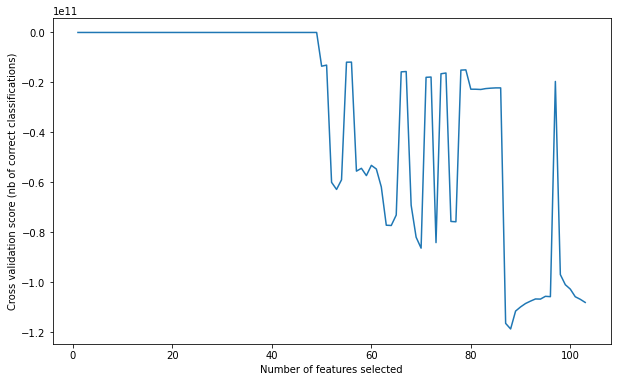

In [118]:
# Create the RFE object and compute a cross-validated score.
# The "RMSE" is selected as it gives scores very close to the target value and gives better R2 value 
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=10, scoring='neg_root_mean_squared_error')
rfecv.fit(X_train,y_train )

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [119]:
# Keeping only the optimal columns selected through RFECv 
X_train = X_train[list(X.columns[rfecv.support_])]

In [120]:
# Keeping only the optimal columns selected through RFECv 
X_test = X_test[list(X.columns[rfecv.support_])]

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MasVnrArea                      920 non-null    float64
 1   BsmtFinSF1                      920 non-null    float64
 2   2ndFlrSF                        920 non-null    float64
 3   GrLivArea                       920 non-null    float64
 4   BsmtFullBath                    920 non-null    float64
 5   FullBath                        920 non-null    float64
 6   HalfBath                        920 non-null    float64
 7   TotRmsAbvGrd                    920 non-null    float64
 8   Fireplaces                      920 non-null    float64
 9   GarageArea                      920 non-null    float64
 10  WoodDeckSF                      920 non-null    float64
 11  MSSubClass_1.5 finished         920 non-null    uint8  
 12  MSSubClass_2-story 1946-new     920 

### Finding correlation 

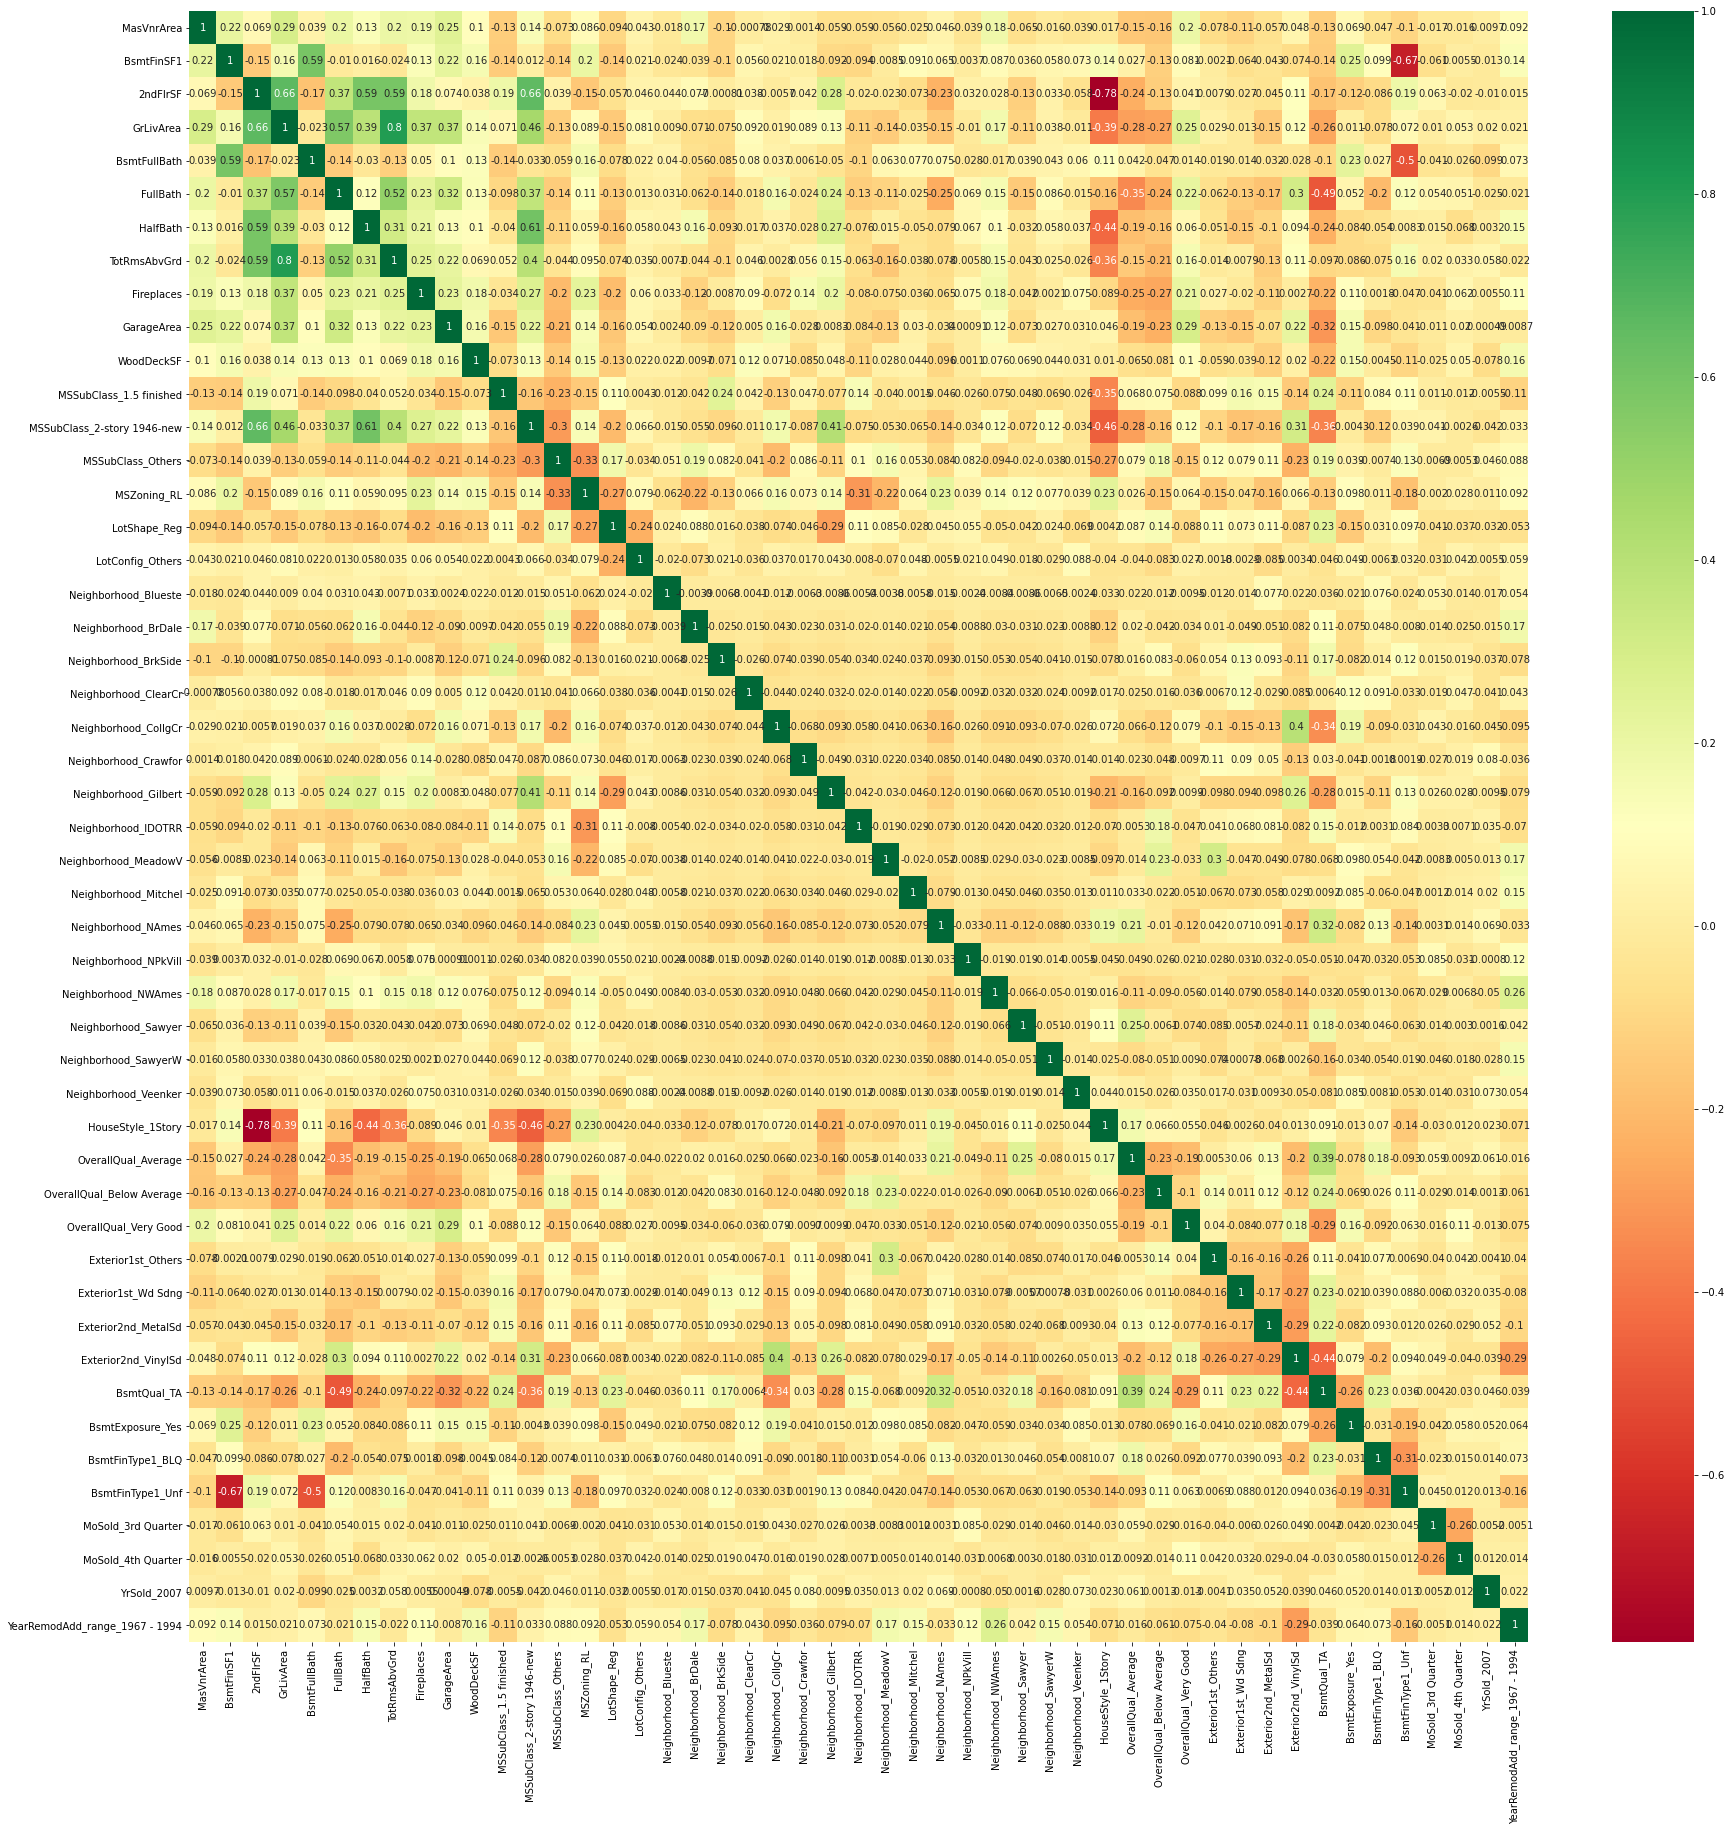

In [122]:
plt.subplots(figsize=(30, 30))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Linear regresssion 

In [123]:
import statsmodels.api as sm

In [124]:
X_train = sm.add_constant(X_train)

In [125]:
y_train_r = y_train

In [126]:
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     70.42
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.34e-266
Time:                        20:43:42   Log-Likelihood:                -568.20
No. Observations:                 920   AIC:                             1236.
Df Residuals:                     870   BIC:                             1478.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4635      0.098      4.712      0.000       0.270       0.657
MasVnrArea                        -0.0050      0.018     -0.281      0.778      -0.040       0.030
BsmtFinSF1                        -0.0992      0.025     -3.895      0.000      -0.149      -0.049
2ndFlrSF                          -0.0297      0.042     -0.707      0.480      -0.112       0.053
GrLivArea                          0.2276      0.038      6.000      0.000       0.153       0.302
BsmtFullBath                       0.0669      0.020      3.295      0.001       0.027       0.107
FullBath                           0.1249      0.024      5.196      0.000       0.078       0.172
HalfBath                           0.0857      0.023      3.723      0.000       0.041       0.131
TotRmsAbvGrd                       0.0286      0.029      0.994      0.320      -0.028       0.085
Fireplaces                         0.0903      0.019      4.718      0.000       0.053       0.128
GarageArea                         0.1462      0.019      7.804      0.000       0.109       0.183
WoodDeckSF                         0.0454      0.017      2.736      0.006       0.013       0.078
MSSubClass_1.5 finished           -0.3421      0.093     -3.687      0.000      -0.524      -0.160
MSSubClass_2-story 1946-new       -0.1541      0.090     -1.712      0.087      -0.331       0.023
MSSubClass_Others                 -0.3725      0.064     -5.828      0.000      -0.498      -0.247
MSZoning_RL                        0.0894      0.052      1.714      0.087      -0.013       0.192
LotShape_Reg                      -0.0683      0.037     -1.842      0.066      -0.141       0.004
LotConfig_Others                   0.0548      0.036      1.512      0.131      -0.016       0.126
Neighborhood_Blueste              -0.6904      0.474     -1.456      0.146      -1.621       0.240
Neighborhood_BrDale               -0.2189      0.153     -1.428      0.154      -0.520       0.082
Neighborhood_BrkSide               0.1959      0.086      2.290      0.022       0.028       0.364
Neighborhood_ClearCr               0.6753      0.135      5.016      0.000       0.411       0.939
Neighborhood_CollgCr              -0.0483      0.064     -0.754      0.451      -0.174       0.078
Neighborhood_Crawfor               0.5878      0.093      6.307      0.000       0.405       0.771
Neighborhood_Gilbert              -0.2055      0.085     -2.418      0.016      -0.372      -0.039
Neighborhood_IDOTRR               -0.0733      0.106     -0.689      0.491      -0.282       0.136
Neighborhood_MeadowV              -0.3019      0.162     -1.862      0.063      -0.620       0.016
Neighborhood_Mitchel              -0.0736      0.099     -0.746      0.456      -0.267       0.120
Neighborhood_N

In [127]:
X_train = X_train.drop(['const'], axis=1)

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,HouseStyle_1Story,8.69
14,MSZoning_RL,8.06
2,2ndFlrSF,7.16
3,GrLivArea,6.20
41,BsmtQual_TA,5.87
12,MSSubClass_2-story 1946-new,5.30
13,MSSubClass_Others,3.67
15,LotShape_Reg,3.62
44,BsmtFinType1_Unf,3.60
7,TotRmsAbvGrd,3.56


In [129]:
X_train=X_train.drop(['HouseStyle_1Story'],axis=1)

In [130]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     71.83
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          3.11e-267
Time:                        20:43:43   Log-Likelihood:                -568.93
No. Observations:                 920   AIC:                             1236.
Df Residuals:                     871   BIC:                             1472.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3951      0.079      4.972      0.000       0.239       0.551
MasVnrArea                        -0.0042      0.018     -0.236      0.813      -0.039       0.031
BsmtFinSF1                        -0.0987      0.025     -3.876      0.000      -0.149      -0.049
2ndFlrSF                          -0.0056      0.037     -0.153      0.879      -0.078       0.066
GrLivArea                          0.2220      0.038      5.896      0.000       0.148       0.296
BsmtFullBath                       0.0683      0.020      3.369      0.001       0.029       0.108
FullBath                           0.1220      0.024      5.100      0.000       0.075       0.169
HalfBath                           0.0842      0.023      3.663      0.000       0.039       0.129
TotRmsAbvGrd                       0.0302      0.029      1.050      0.294      -0.026       0.087
Fireplaces                         0.0906      0.019      4.734      0.000       0.053       0.128
GarageArea                         0.1462      0.019      7.800      0.000       0.109       0.183
WoodDeckSF                         0.0452      0.017      2.719      0.007       0.013       0.078
MSSubClass_1.5 finished           -0.2696      0.070     -3.877      0.000      -0.406      -0.133
MSSubClass_2-story 1946-new       -0.1095      0.082     -1.340      0.180      -0.270       0.051
MSSubClass_Others                 -0.3248      0.049     -6.564      0.000      -0.422      -0.228
MSZoning_RL                        0.0887      0.052      1.701      0.089      -0.014       0.191
LotShape_Reg                      -0.0706      0.037     -1.907      0.057      -0.143       0.002
LotConfig_Others                   0.0544      0.036      1.502      0.133      -0.017       0.126
Neighborhood_Blueste              -0.6936      0.474     -1.463      0.144      -1.624       0.237
Neighborhood_BrDale               -0.2026      0.153     -1.327      0.185      -0.502       0.097
Neighborhood_BrkSide               0.1924      0.086      2.250      0.025       0.025       0.360
Neighborhood_ClearCr               0.6620      0.134      4.934      0.000       0.399       0.925
Neighborhood_CollgCr              -0.0479      0.064     -0.747      0.455      -0.174       0.078
Neighborhood_Crawfor               0.5813      0.093      6.247      0.000       0.399       0.764
Neighborhood_Gilbert              -0.2047      0.085     -2.408      0.016      -0.372      -0.038
Neighborhood_IDOTRR               -0.0694      0.106     -0.652      0.514      -0.278       0.139
Neighborhood_MeadowV              -0.2731      0.160     -1.703      0.089      -0.588       0.042
Neighborhood_Mitchel              -0.0693      0.099     -0.703      0.482      -0.263       0.124
Neighborhood_N

In [131]:
X_train = X_train.drop(['const'], axis=1)

In [132]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,MSZoning_RL,7.43
3,GrLivArea,6.11
2,2ndFlrSF,5.80
40,BsmtQual_TA,5.44
12,MSSubClass_2-story 1946-new,4.91
43,BsmtFinType1_Unf,3.55
7,TotRmsAbvGrd,3.50
15,LotShape_Reg,3.40
39,Exterior2nd_VinylSd,2.98
13,MSSubClass_Others,2.88


In [133]:
X_train=X_train.drop(['MSZoning_RL'],axis=1)

In [134]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     73.13
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.50e-267
Time:                        20:43:44   Log-Likelihood:                -570.46
No. Observations:                 920   AIC:                             1237.
Df Residuals:                     872   BIC:                             1468.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4536      0.072      6.324      0.000       0.313       0.594
MasVnrArea                        -0.0037      0.018     -0.209      0.834      -0.039       0.031
BsmtFinSF1                        -0.0995      0.026     -3.904      0.000      -0.150      -0.049
2ndFlrSF                          -0.0160      0.036     -0.441      0.660      -0.087       0.055
GrLivArea                          0.2235      0.038      5.934      0.000       0.150       0.297
BsmtFullBath                       0.0697      0.020      3.436      0.001       0.030       0.109
FullBath                           0.1243      0.024      5.201      0.000       0.077       0.171
HalfBath                           0.0866      0.023      3.768      0.000       0.041       0.132
TotRmsAbvGrd                       0.0328      0.029      1.139      0.255      -0.024       0.089
Fireplaces                         0.0938      0.019      4.919      0.000       0.056       0.131
GarageArea                         0.1444      0.019      7.708      0.000       0.108       0.181
WoodDeckSF                         0.0463      0.017      2.783      0.006       0.014       0.079
MSSubClass_1.5 finished           -0.2660      0.070     -3.823      0.000      -0.403      -0.129
MSSubClass_2-story 1946-new       -0.1015      0.082     -1.243      0.214      -0.262       0.059
MSSubClass_Others                 -0.3308      0.049     -6.696      0.000      -0.428      -0.234
LotShape_Reg                      -0.0765      0.037     -2.073      0.038      -0.149      -0.004
LotConfig_Others                   0.0546      0.036      1.506      0.133      -0.017       0.126
Neighborhood_Blueste              -0.7331      0.474     -1.546      0.122      -1.664       0.197
Neighborhood_BrDale               -0.2434      0.151     -1.612      0.107      -0.540       0.053
Neighborhood_BrkSide               0.1929      0.086      2.253      0.025       0.025       0.361
Neighborhood_ClearCr               0.6905      0.133      5.182      0.000       0.429       0.952
Neighborhood_CollgCr              -0.0200      0.062     -0.323      0.747      -0.142       0.102
Neighborhood_Crawfor               0.6141      0.091      6.739      0.000       0.435       0.793
Neighborhood_Gilbert              -0.1741      0.083     -2.093      0.037      -0.337      -0.011
Neighborhood_IDOTRR               -0.1146      0.103     -1.110      0.267      -0.317       0.088
Neighborhood_MeadowV              -0.3244      0.158     -2.058      0.040      -0.634      -0.015
Neighborhood_Mitchel              -0.0450      0.098     -0.461      0.645      -0.237       0.147
Neighborhood_NAmes                 0.0334      0.054      0.616      0.538      -0.073       0.140
Neighborhood_N

In [135]:
X_train = X_train.drop(['const'], axis=1)

In [136]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,6.10
2,2ndFlrSF,5.54
39,BsmtQual_TA,5.36
12,MSSubClass_2-story 1946-new,4.81
42,BsmtFinType1_Unf,3.54
7,TotRmsAbvGrd,3.50
14,LotShape_Reg,3.38
13,MSSubClass_Others,2.88
38,Exterior2nd_VinylSd,2.87
1,BsmtFinSF1,2.76


In [137]:
X_train=X_train.drop(['GrLivArea'],axis=1)

In [138]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     71.17
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          4.40e-261
Time:                        20:43:45   Log-Likelihood:                -588.67
No. Observations:                 920   AIC:                             1271.
Df Residuals:                     873   BIC:                             1498.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4723      0.073      6.467      0.000       0.329       0.616
MasVnrArea                         0.0101      0.018      0.560      0.575      -0.025       0.046
BsmtFinSF1                        -0.0520      0.025     -2.107      0.035      -0.100      -0.004
2ndFlrSF                           0.0731      0.034      2.173      0.030       0.007       0.139
BsmtFullBath                       0.0714      0.021      3.453      0.001       0.031       0.112
FullBath                           0.1545      0.024      6.487      0.000       0.108       0.201
HalfBath                           0.0971      0.023      4.157      0.000       0.051       0.143
TotRmsAbvGrd                       0.1318      0.024      5.517      0.000       0.085       0.179
Fireplaces                         0.1075      0.019      5.566      0.000       0.070       0.145
GarageArea                         0.1670      0.019      8.936      0.000       0.130       0.204
WoodDeckSF                         0.0476      0.017      2.810      0.005       0.014       0.081
MSSubClass_1.5 finished           -0.2788      0.071     -3.932      0.000      -0.418      -0.140
MSSubClass_2-story 1946-new       -0.1768      0.082     -2.151      0.032      -0.338      -0.015
MSSubClass_Others                 -0.3678      0.050     -7.362      0.000      -0.466      -0.270
LotShape_Reg                      -0.0859      0.038     -2.285      0.023      -0.160      -0.012
LotConfig_Others                   0.0610      0.037      1.651      0.099      -0.012       0.134
Neighborhood_Blueste              -0.7870      0.483     -1.628      0.104      -1.735       0.162
Neighborhood_BrDale               -0.3638      0.153     -2.385      0.017      -0.663      -0.064
Neighborhood_BrkSide               0.2052      0.087      2.352      0.019       0.034       0.376
Neighborhood_ClearCr               0.7261      0.136      5.350      0.000       0.460       0.992
Neighborhood_CollgCr              -0.0482      0.063     -0.765      0.445      -0.172       0.076
Neighborhood_Crawfor               0.6308      0.093      6.793      0.000       0.449       0.813
Neighborhood_Gilbert              -0.2467      0.084     -2.941      0.003      -0.411      -0.082
Neighborhood_IDOTRR               -0.1523      0.105     -1.450      0.147      -0.358       0.054
Neighborhood_MeadowV              -0.3902      0.160     -2.434      0.015      -0.705      -0.076
Neighborhood_Mitchel              -0.0563      0.100     -0.566      0.572      -0.252       0.139
Neighborhood_NAmes                 0.0207      0.055      0.375      0.708      -0.088       0.129
Neighborhood_NPkVill              -0.6676      0.225     -2.972      0.003      -1.109      -0.227
Neighborhood_N

In [139]:
X_train = X_train.drop(['const'], axis=1)

In [140]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,BsmtQual_TA,5.36
11,MSSubClass_2-story 1946-new,4.70
2,2ndFlrSF,4.60
41,BsmtFinType1_Unf,3.44
13,LotShape_Reg,3.38
37,Exterior2nd_VinylSd,2.87
12,MSSubClass_Others,2.84
31,OverallQual_Average,2.63
1,BsmtFinSF1,2.47
6,TotRmsAbvGrd,2.32


In [141]:
X_train=X_train.drop(['BsmtQual_TA'],axis=1)

In [142]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     69.43
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          5.51e-255
Time:                        20:43:46   Log-Likelihood:                -605.94
No. Observations:                 920   AIC:                             1304.
Df Residuals:                     874   BIC:                             1526.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3474      0.071      4.890      0.000       0.208       0.487
MasVnrArea                         0.0102      0.018      0.555      0.579      -0.026       0.046
BsmtFinSF1                        -0.0434      0.025     -1.729      0.084      -0.093       0.006
2ndFlrSF                           0.0776      0.034      2.266      0.024       0.010       0.145
BsmtFullBath                       0.0771      0.021      3.667      0.000       0.036       0.118
FullBath                           0.1918      0.023      8.215      0.000       0.146       0.238
HalfBath                           0.1148      0.024      4.867      0.000       0.068       0.161
TotRmsAbvGrd                       0.1043      0.024      4.375      0.000       0.058       0.151
Fireplaces                         0.1065      0.020      5.416      0.000       0.068       0.145
GarageArea                         0.1700      0.019      8.936      0.000       0.133       0.207
WoodDeckSF                         0.0576      0.017      3.357      0.001       0.024       0.091
MSSubClass_1.5 finished           -0.3191      0.072     -4.441      0.000      -0.460      -0.178
MSSubClass_2-story 1946-new       -0.1955      0.084     -2.337      0.020      -0.360      -0.031
MSSubClass_Others                 -0.3804      0.051     -7.484      0.000      -0.480      -0.281
LotShape_Reg                      -0.0988      0.038     -2.585      0.010      -0.174      -0.024
LotConfig_Others                   0.0565      0.038      1.500      0.134      -0.017       0.130
Neighborhood_Blueste              -0.6878      0.492     -1.399      0.162      -1.653       0.277
Neighborhood_BrDale               -0.4985      0.154     -3.248      0.001      -0.800      -0.197
Neighborhood_BrkSide               0.1623      0.089      1.834      0.067      -0.011       0.336
Neighborhood_ClearCr               0.7176      0.138      5.193      0.000       0.446       0.989
Neighborhood_CollgCr               0.0028      0.064      0.044      0.965      -0.122       0.128
Neighborhood_Crawfor               0.6337      0.095      6.702      0.000       0.448       0.819
Neighborhood_Gilbert              -0.1950      0.085     -2.296      0.022      -0.362      -0.028
Neighborhood_IDOTRR               -0.1885      0.107     -1.766      0.078      -0.398       0.021
Neighborhood_MeadowV              -0.2608      0.162     -1.613      0.107      -0.578       0.056
Neighborhood_Mitchel              -0.0944      0.101     -0.933      0.351      -0.293       0.104
Neighborhood_NAmes                -0.0458      0.055     -0.832      0.406      -0.154       0.062
Neighborhood_NPkVill              -0.6391      0.229     -2.794      0.005      -1.088      -0.190
Neighborhood_N

In [143]:
X_train = X_train.drop(['const'], axis=1)

In [144]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,MSSubClass_2-story 1946-new,4.64
2,2ndFlrSF,4.58
40,BsmtFinType1_Unf,3.43
13,LotShape_Reg,3.28
37,Exterior2nd_VinylSd,2.86
12,MSSubClass_Others,2.79
1,BsmtFinSF1,2.47
31,OverallQual_Average,2.45
6,TotRmsAbvGrd,2.26
5,HalfBath,2.22


In [145]:
X_train=X_train.drop(['Neighborhood_CollgCr'],axis=1)          # High p value = 0.965

In [146]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     71.09
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          6.50e-256
Time:                        20:43:47   Log-Likelihood:                -605.94
No. Observations:                 920   AIC:                             1302.
Df Residuals:                     875   BIC:                             1519.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3481      0.069      5.019      0.000       0.212       0.484
MasVnrArea                         0.0102      0.018      0.554      0.580      -0.026       0.046
BsmtFinSF1                        -0.0434      0.025     -1.732      0.084      -0.093       0.006
2ndFlrSF                           0.0775      0.034      2.274      0.023       0.011       0.144
BsmtFullBath                       0.0771      0.021      3.670      0.000       0.036       0.118
FullBath                           0.1918      0.023      8.226      0.000       0.146       0.238
HalfBath                           0.1148      0.024      4.876      0.000       0.069       0.161
TotRmsAbvGrd                       0.1044      0.024      4.382      0.000       0.058       0.151
Fireplaces                         0.1064      0.020      5.443      0.000       0.068       0.145
GarageArea                         0.1700      0.019      8.943      0.000       0.133       0.207
WoodDeckSF                         0.0576      0.017      3.362      0.001       0.024       0.091
MSSubClass_1.5 finished           -0.3193      0.072     -4.462      0.000      -0.460      -0.179
MSSubClass_2-story 1946-new       -0.1951      0.083     -2.350      0.019      -0.358      -0.032
MSSubClass_Others                 -0.3807      0.050     -7.572      0.000      -0.479      -0.282
LotShape_Reg                      -0.0989      0.038     -2.593      0.010      -0.174      -0.024
LotConfig_Others                   0.0565      0.038      1.503      0.133      -0.017       0.130
Neighborhood_Blueste              -0.6879      0.492     -1.400      0.162      -1.653       0.277
Neighborhood_BrDale               -0.4988      0.153     -3.254      0.001      -0.800      -0.198
Neighborhood_BrkSide               0.1621      0.088      1.835      0.067      -0.011       0.336
Neighborhood_ClearCr               0.7170      0.137      5.218      0.000       0.447       0.987
Neighborhood_Crawfor               0.6335      0.094      6.714      0.000       0.448       0.819
Neighborhood_Gilbert              -0.1963      0.080     -2.454      0.014      -0.353      -0.039
Neighborhood_IDOTRR               -0.1887      0.107     -1.771      0.077      -0.398       0.020
Neighborhood_MeadowV              -0.2611      0.161     -1.618      0.106      -0.578       0.056
Neighborhood_Mitchel              -0.0952      0.099     -0.961      0.337      -0.290       0.099
Neighborhood_NAmes                -0.0464      0.053     -0.875      0.382      -0.151       0.058
Neighborhood_NPkVill              -0.6395      0.228     -2.799      0.005      -1.088      -0.191
Neighborhood_NWAmes                0.0775      0.081      0.962      0.336      -0.081       0.235
Neighborhood_S

In [147]:
X_train = X_train.drop(['const'], axis=1)

In [148]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,2ndFlrSF,4.50
11,MSSubClass_2-story 1946-new,4.50
39,BsmtFinType1_Unf,3.42
13,LotShape_Reg,3.28
12,MSSubClass_Others,2.77
36,Exterior2nd_VinylSd,2.57
1,BsmtFinSF1,2.47
30,OverallQual_Average,2.44
6,TotRmsAbvGrd,2.26
5,HalfBath,2.21


In [149]:
X_train=X_train.drop(['Neighborhood_Sawyer'],axis=1)

In [150]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     72.81
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          8.20e-257
Time:                        20:43:48   Log-Likelihood:                -606.03
No. Observations:                 920   AIC:                             1300.
Df Residuals:                     876   BIC:                             1512.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3403      0.067      5.110      0.000       0.210       0.471
MasVnrArea                         0.0103      0.018      0.564      0.573      -0.026       0.046
BsmtFinSF1                        -0.0434      0.025     -1.733      0.083      -0.093       0.006
2ndFlrSF                           0.0789      0.034      2.330      0.020       0.012       0.145
BsmtFullBath                       0.0772      0.021      3.673      0.000       0.036       0.118
FullBath                           0.1927      0.023      8.306      0.000       0.147       0.238
HalfBath                           0.1145      0.024      4.868      0.000       0.068       0.161
TotRmsAbvGrd                       0.1033      0.024      4.366      0.000       0.057       0.150
Fireplaces                         0.1059      0.020      5.431      0.000       0.068       0.144
GarageArea                         0.1703      0.019      8.963      0.000       0.133       0.208
WoodDeckSF                         0.0574      0.017      3.350      0.001       0.024       0.091
MSSubClass_1.5 finished           -0.3183      0.071     -4.453      0.000      -0.459      -0.178
MSSubClass_2-story 1946-new       -0.1963      0.083     -2.367      0.018      -0.359      -0.034
MSSubClass_Others                 -0.3800      0.050     -7.566      0.000      -0.479      -0.281
LotShape_Reg                      -0.0981      0.038     -2.578      0.010      -0.173      -0.023
LotConfig_Others                   0.0568      0.038      1.511      0.131      -0.017       0.131
Neighborhood_Blueste              -0.6875      0.491     -1.399      0.162      -1.652       0.277
Neighborhood_BrDale               -0.4929      0.153     -3.232      0.001      -0.792      -0.194
Neighborhood_BrkSide               0.1662      0.088      1.894      0.059      -0.006       0.338
Neighborhood_ClearCr               0.7225      0.137      5.287      0.000       0.454       0.991
Neighborhood_Crawfor               0.6379      0.094      6.811      0.000       0.454       0.822
Neighborhood_Gilbert              -0.1932      0.080     -2.427      0.015      -0.349      -0.037
Neighborhood_IDOTRR               -0.1847      0.106     -1.741      0.082      -0.393       0.023
Neighborhood_MeadowV              -0.2581      0.161     -1.602      0.110      -0.574       0.058
Neighborhood_Mitchel              -0.0890      0.098     -0.910      0.363      -0.281       0.103
Neighborhood_NAmes                -0.0395      0.050     -0.787      0.432      -0.138       0.059
Neighborhood_NPkVill              -0.6339      0.228     -2.781      0.006      -1.081      -0.187
Neighborhood_NWAmes                0.0843      0.079      1.073      0.284      -0.070       0.239
Neighborhood_S

In [151]:
X_train = X_train.drop(['const'], axis=1)

In [152]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,MSSubClass_2-story 1946-new,4.44
2,2ndFlrSF,4.38
38,BsmtFinType1_Unf,3.42
13,LotShape_Reg,3.27
12,MSSubClass_Others,2.76
35,Exterior2nd_VinylSd,2.55
1,BsmtFinSF1,2.47
29,OverallQual_Average,2.27
6,TotRmsAbvGrd,2.24
5,HalfBath,2.21


Values with high P values are dropped 

Dropping them one by one doesnt seem to have a huge impact on the other. SO doing that in one step 

In [153]:
X_train=X_train.drop(['MasVnrArea','BsmtFinSF1','LotConfig_Others','Neighborhood_Blueste','Neighborhood_MeadowV',
                      'Neighborhood_IDOTRR','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NWAmes',
                     'MoSold_4th Quarter','Neighborhood_SawyerW','Exterior1st_Others','Exterior2nd_MetalSd',
                      'MoSold_3rd Quarter','YrSold_2007','YearRemodAdd_range_1967 - 1994'],axis=1)

In [154]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train_r ,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.89e-267
Time:                        20:43:49   Log-Likelihood:                -618.35
No. Observations:                 920   AIC:                             1293.
Df Residuals:                     892   BIC:                             1428.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3650      0.051      7.211      0.000       0.266       0.464
2ndFlrSF                        0.0817      0.033      2.482      0.013       0.017       0.146
BsmtFullBath                    0.0671      0.019      3.486      0.001       0.029       0.105
FullBath                        0.1988      0.023      8.811      0.000       0.155       0.243
HalfBath                        0.1060      0.023      4.569      0.000       0.060       0.152
TotRmsAbvGrd                    0.1042      0.023      4.596      0.000       0.060       0.149
Fireplaces                      0.1023      0.019      5.309      0.000       0.064       0.140
GarageArea                      0.1652      0.019      8.871      0.000       0.129       0.202
WoodDeckSF                      0.0531      0.017      3.149      0.002       0.020       0.086
MSSubClass_1.5 finished        -0.3106      0.070     -4.443      0.000      -0.448      -0.173
MSSubClass_2-story 1946-new    -0.1740      0.082     -2.132      0.033      -0.334      -0.014
MSSubClass_Others              -0.3901      0.049     -7.920      0.000      -0.487      -0.293
LotShape_Reg                   -0.1054      0.037     -2.871      0.004      -0.178      -0.033
Neighborhood_BrDale            -0.5165      0.145     -3.568      0.000      -0.801      -0.232
Neighborhood_BrkSide            0.2100      0.086      2.447      0.015       0.042       0.378
Neighborhood_ClearCr            0.7237      0.135      5.344      0.000       0.458       0.989
Neighborhood_Crawfor            0.6648      0.091      7.285      0.000       0.486       0.844
Neighborhood_Gilbert           -0.2150      0.077     -2.775      0.006      -0.367      -0.063
Neighborhood_NPkVill           -0.6549      0.223     -2.931      0.003      -1.093      -0.216
Neighborhood_Veenker            0.4351      0.219      1.983      0.048       0.004       0.866
OverallQual_Average            -0.4161      0.044     -9.529      0.000      -0.502      -0.330
OverallQual_Below Average      -0.7120      0.063    -11.392      0.000      -0.835      -0.589
OverallQual_Very Good           0.6411      0.066      9.728      0.000       0.512       0.770
Exterior1st_Wd Sdng            -0.1099      0.049     -2.242      0.025      -0.206      -0.014
Exterior2nd_VinylSd             0.2395      0.041      5.873      0.000       0.159       0.320
BsmtExposure_Yes                0.1385      0.039      3.520      0.000       0.061       0.216
BsmtFinType1_BLQ               -0.1003      0.048     -2.076      0.038      -0.195      -0.005
BsmtFinType1_Unf               -0.1891      0.044     -4.311      0.000      -0.275      -0.103
==============================================================================
Omnibus:                    

In [155]:
X_train = X_train.drop(['const'], axis=1)

In [156]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,2ndFlrSF,3.76
9,MSSubClass_2-story 1946-new,3.72
11,LotShape_Reg,2.79
26,BsmtFinType1_Unf,2.45
10,MSSubClass_Others,2.43
3,HalfBath,2.13
19,OverallQual_Average,2.05
4,TotRmsAbvGrd,2.04
2,FullBath,1.99
23,Exterior2nd_VinylSd,1.91


In [157]:
# Constant is added back after checking the VIF 
X_train = sm.add_constant(X_train)

#### The above model with R2 value 0.775 is taken as the training model 

In [158]:
y_train_pred = lm.predict(X_train)

Text(0.5, 0, 'Errors')

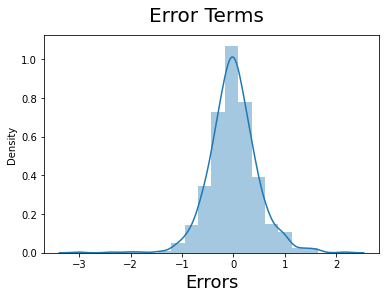

In [159]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred.values.reshape(-1,1)), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Normal curve with mean error as zero 

## Prediction

In [160]:
X_train.columns

Index(['const', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'MSSubClass_1.5 finished', 'MSSubClass_2-story 1946-new',
       'MSSubClass_Others', 'LotShape_Reg', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'OverallQual_Average', 'OverallQual_Below Average',
       'OverallQual_Very Good', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd',
       'BsmtExposure_Yes', 'BsmtFinType1_BLQ', 'BsmtFinType1_Unf'],
      dtype='object')

In [161]:
X_test = X_test[['2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'MSSubClass_1.5 finished', 'MSSubClass_2-story 1946-new',
       'MSSubClass_Others', 'LotShape_Reg', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'OverallQual_Average', 'OverallQual_Below Average',
       'OverallQual_Very Good', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd',
       'BsmtExposure_Yes', 'BsmtFinType1_BLQ', 'BsmtFinType1_Unf']]
X_test_new = sm.add_constant(X_test)

In [162]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

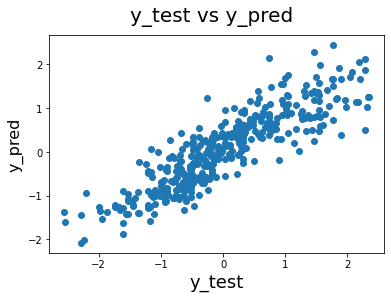

In [163]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [164]:
from sklearn import metrics

In [165]:
metrics.r2_score(y_test,y_pred)

0.7712608096790248

Creating a function to easily implement 

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# function to predict the mean_absolute_error, mean_squared_error and r-squared
def predict_metrics(lr, x, y,j=0):
    pred = lr.predict(x)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if j!=0:
        print('Mean Abs Error = ', mae)
        print('Mean Sqr Error = ', mse)
        print('Root MSE = ', rmse)
        print('R2 Value', r2)
    return mae, mse, r2 ,rmse

In [167]:
predict_metrics(lm, X_train, y_train_r)

(0.3458353958364927,
 0.22455418800875426,
 0.7754458119912457,
 0.47387148891735853)

In [168]:
y_test_r = y_test

In [169]:
predict_metrics(lm, X_test_new, y_test_r,j=1)

Mean Abs Error =  0.3671407783008984
Mean Sqr Error =  0.22873919032097523
Root MSE =  0.47826686098973575
R2 Value 0.7712608096790248


(0.3671407783008984,
 0.22873919032097523,
 0.7712608096790248,
 0.47826686098973575)

## Regularization - Ridge 

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
from sklearn.linear_model import Ridge,Lasso
# creating a KFold object with 5 splits 
folds =  5

# specify range of hyperparameters
hyper_params = {'alpha' :[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100] }
scoring = {'R2 score': 'r2'}

# set up GridSearchCV()
model_cv_r = GridSearchCV(estimator = Ridge(), 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model

model_cv_r.fit(X_train, y_train_r) 



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='r2')

In [172]:

print("best params: " + str(model_cv_r.best_estimator_))
print("best params: " + str(model_cv_r.best_params_))
print('best score:', model_cv_r.best_score_)


results = model_cv_r.cv_results_

best params: Ridge(alpha=0.9)
best params: {'alpha': 0.9}
best score: 0.7511383054500061


In [173]:
re = pd.DataFrame(results)

In [174]:
predict_metrics(model_cv_r, X_test_new, y_test_r,j=1)

Mean Abs Error =  0.36590891632820866
Mean Sqr Error =  0.22741618386609297
Root MSE =  0.47688172943203955
R2 Value 0.772583816133907


(0.36590891632820866,
 0.22741618386609297,
 0.772583816133907,
 0.47688172943203955)

## Regularization - Lasso

In [175]:
from sklearn.linear_model import Ridge,Lasso
folds =  5

# specify range of hyperparameters
hyper_params = {'alpha' :[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100] }

# set up GridSearchCV()
model_cv_l = GridSearchCV(estimator = Lasso(), 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model

model_cv_l.fit(X_train, y_train_r) 



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='r2')

In [176]:

print("best params: " + str(model_cv_l.best_estimator_))
print("best params: " + str(model_cv_l.best_params_))
print('best score:', model_cv_l.best_score_)


results = model_cv_l.cv_results_

best params: Lasso(alpha=0.0001)
best params: {'alpha': 0.0001}
best score: 0.7507055178573822


In [177]:
re = pd.DataFrame(results)

In [178]:
predict_metrics(model_cv_l, X_test_new, y_test_r,j=1)

Mean Abs Error =  0.3669127251086915
Mean Sqr Error =  0.2284901194055406
Root MSE =  0.478006401008962
R2 Value 0.7715098805944594


(0.3669127251086915, 0.2284901194055406, 0.7715098805944594, 0.478006401008962)

## Comaparing the coefficeints obtained from linear , ridge and lasso

In [179]:
# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.9)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X_train, y_train_r).coef_

In [180]:
# Creating an object containing the best ridge regression model
best_lasso_model= Lasso(alpha=0.0001)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_train, y_train_r).coef_

In [181]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':lm.params,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=X_train.columns)
# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color

comparing_models

,without_regularization,Ridge,Lasso
const,0.365030,0.000000,0.000000
2ndFlrSF,0.081665,0.078795,0.080013
BsmtFullBath,0.067096,0.068739,0.067434
FullBath,0.198819,0.198393,0.198708
HalfBath,0.106041,0.103782,0.105417
TotRmsAbvGrd,0.104161,0.105873,0.104436
Fireplaces,0.102255,0.104715,0.102556
GarageArea,0.165163,0.166507,0.165454
WoodDeckSF,0.053060,0.053215,0.053039
MSSubClass_1.5 finished,-0.310554,-0.300930,-0.306493


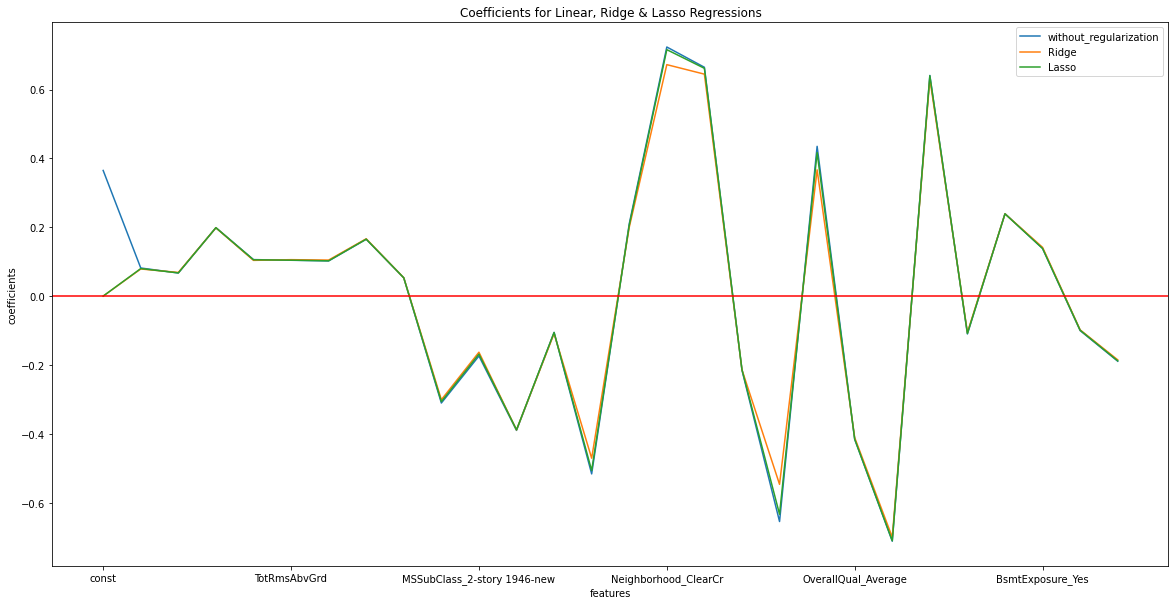

In [182]:
comparing_models.plot(figsize=(20, 10))
plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [183]:
comparing_models['Ridge'].sort_values(ascending=False)

Neighborhood_ClearCr           0.672437
Neighborhood_Crawfor           0.644835
OverallQual_Very Good          0.631251
Neighborhood_Veenker           0.366848
Exterior2nd_VinylSd            0.239068
Neighborhood_BrkSide           0.199809
FullBath                       0.198393
GarageArea                     0.166507
BsmtExposure_Yes               0.141665
TotRmsAbvGrd                   0.105873
Fireplaces                     0.104715
HalfBath                       0.103782
2ndFlrSF                       0.078795
BsmtFullBath                   0.068739
WoodDeckSF                     0.053215
const                          0.000000
BsmtFinType1_BLQ              -0.098101
Exterior1st_Wd Sdng           -0.105521
LotShape_Reg                  -0.108770
MSSubClass_2-story 1946-new   -0.162951
BsmtFinType1_Unf              -0.185145
Neighborhood_Gilbert          -0.213794
MSSubClass_1.5 finished       -0.300930
MSSubClass_Others             -0.388653
OverallQual_Average           -0.411084


In [184]:
comparing_models['Lasso'].sort_values(ascending=False)

Neighborhood_ClearCr           0.715982
Neighborhood_Crawfor           0.661789
OverallQual_Very Good          0.640113
Neighborhood_Veenker           0.416931
Exterior2nd_VinylSd            0.238988
Neighborhood_BrkSide           0.205732
FullBath                       0.198708
GarageArea                     0.165454
BsmtExposure_Yes               0.138528
HalfBath                       0.105417
TotRmsAbvGrd                   0.104436
Fireplaces                     0.102556
2ndFlrSF                       0.080013
BsmtFullBath                   0.067434
WoodDeckSF                     0.053039
const                          0.000000
BsmtFinType1_BLQ              -0.099074
LotShape_Reg                  -0.105739
Exterior1st_Wd Sdng           -0.108474
MSSubClass_2-story 1946-new   -0.168539
BsmtFinType1_Unf              -0.187954
Neighborhood_Gilbert          -0.213454
MSSubClass_1.5 finished       -0.306493
MSSubClass_Others             -0.388483
OverallQual_Average           -0.415378


## Comaparing the coefficeints obtained from linear , ridge and lasso for double the value of alpha for ridge and lasso

In [185]:
# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.9*2)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X_train, y_train_r).coef_

In [186]:
# Creating an object containing the best ridge regression model
best_lasso_model= Lasso(alpha=0.0001*2)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_train, y_train_r).coef_

In [187]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models_1 = pd.DataFrame({'without_regularization':lm.params,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=X_train.columns)
# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color

comparing_models_1

,without_regularization,Ridge,Lasso
const,0.365030,0.000000,0.000000
2ndFlrSF,0.081665,0.076282,0.078350
BsmtFullBath,0.067096,0.070089,0.067773
FullBath,0.198819,0.198269,0.198596
HalfBath,0.106041,0.101960,0.104787
TotRmsAbvGrd,0.104161,0.107237,0.104710
Fireplaces,0.102255,0.107067,0.102855
GarageArea,0.165163,0.167782,0.165743
WoodDeckSF,0.053060,0.053341,0.053018
MSSubClass_1.5 finished,-0.310554,-0.292106,-0.302405


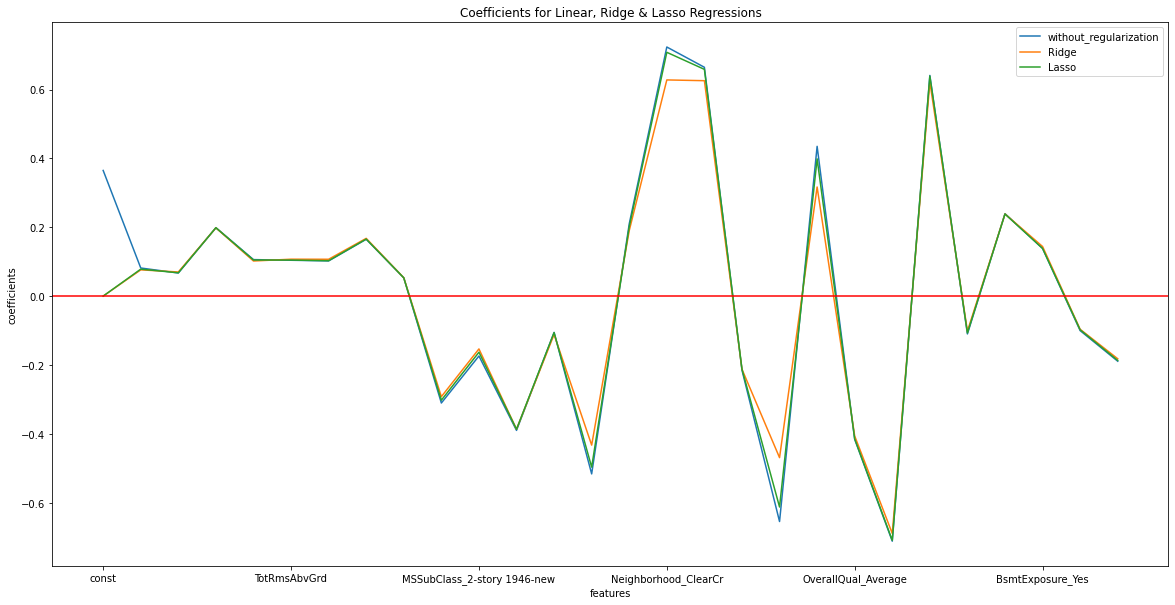

In [188]:
comparing_models_1.plot(figsize=(20, 10))
plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [189]:
comparing_models_1['Ridge'].sort_values(ascending=False)

Neighborhood_ClearCr           0.628049
Neighborhood_Crawfor           0.625813
OverallQual_Very Good          0.621753
Neighborhood_Veenker           0.316950
Exterior2nd_VinylSd            0.238610
FullBath                       0.198269
Neighborhood_BrkSide           0.190324
GarageArea                     0.167782
BsmtExposure_Yes               0.144056
TotRmsAbvGrd                   0.107237
Fireplaces                     0.107067
HalfBath                       0.101960
2ndFlrSF                       0.076282
BsmtFullBath                   0.070089
WoodDeckSF                     0.053341
const                          0.000000
BsmtFinType1_BLQ              -0.096422
Exterior1st_Wd Sdng           -0.101673
LotShape_Reg                  -0.111403
MSSubClass_2-story 1946-new   -0.153437
BsmtFinType1_Unf              -0.181988
Neighborhood_Gilbert          -0.212287
MSSubClass_1.5 finished       -0.292106
MSSubClass_Others             -0.386692
OverallQual_Average           -0.406431


In [190]:
comparing_models_1['Lasso'].sort_values(ascending=False)

Neighborhood_ClearCr           0.708277
Neighborhood_Crawfor           0.658754
OverallQual_Very Good          0.639131
Neighborhood_Veenker           0.398777
Exterior2nd_VinylSd            0.238489
Neighborhood_BrkSide           0.201425
FullBath                       0.198596
GarageArea                     0.165743
BsmtExposure_Yes               0.138588
HalfBath                       0.104787
TotRmsAbvGrd                   0.104710
Fireplaces                     0.102855
2ndFlrSF                       0.078350
BsmtFullBath                   0.067773
WoodDeckSF                     0.053018
const                          0.000000
BsmtFinType1_BLQ              -0.097886
LotShape_Reg                  -0.106041
Exterior1st_Wd Sdng           -0.107070
MSSubClass_2-story 1946-new   -0.163022
BsmtFinType1_Unf              -0.186774
Neighborhood_Gilbert          -0.211928
MSSubClass_1.5 finished       -0.302405
MSSubClass_Others             -0.386848
OverallQual_Average           -0.414675


## Lasso regression after removing top 5 predictor variables of lasso

In [191]:
#Top 5 predictor variables of lasso 

lt = ['Neighborhood_ClearCr','Neighborhood_Crawfor','OverallQual_Very Good','Neighborhood_Veenker','Exterior2nd_VinylSd']

In [192]:
X_train.columns

Index(['const', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'MSSubClass_1.5 finished', 'MSSubClass_2-story 1946-new',
       'MSSubClass_Others', 'LotShape_Reg', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'OverallQual_Average', 'OverallQual_Below Average',
       'OverallQual_Very Good', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd',
       'BsmtExposure_Yes', 'BsmtFinType1_BLQ', 'BsmtFinType1_Unf'],
      dtype='object')

In [194]:
X_train = X_train.drop('const',axis=1)
X_train_l = X_train.drop(lt,axis=1)

In [195]:
from sklearn.linear_model import Ridge,Lasso
folds =  5

# specify range of hyperparameters
hyper_params = {'alpha' :[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100] }

# set up GridSearchCV()
model_cv_l2 = GridSearchCV(estimator = Lasso(), 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model

model_cv_l2.fit(X_train_l, y_train_r) 



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='r2')

In [196]:

print("best params: " + str(model_cv_l2.best_estimator_))
print("best params: " + str(model_cv_l2.best_params_))
print('best score:', model_cv_l2.best_score_)


results = model_cv_l2.cv_results_

best params: Lasso(alpha=0.0001)
best params: {'alpha': 0.0001}
best score: 0.7033929868676945


In [197]:
re = pd.DataFrame(results)

In [198]:
# Creating an object containing the best ridge regression model
best_lasso_model_lt= Lasso(alpha=0.0001)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model_lt.fit(X_train_l, y_train_r).coef_

In [203]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models_lt = pd.DataFrame({'Lasso':best_lasso_coeffs}, index=X_train_l.columns)
# Highlighting coefficient estimates with value '0'


comparing_models_lt

,Lasso
2ndFlrSF,0.105363
BsmtFullBath,0.079715
FullBath,0.207214
HalfBath,0.091197
TotRmsAbvGrd,0.122402
Fireplaces,0.131762
GarageArea,0.194690
WoodDeckSF,0.048340
MSSubClass_1.5 finished,-0.379891
MSSubClass_2-story 1946-new,-0.235419


In [204]:
comparing_models_lt['Lasso'].sort_values(ascending=False)

BsmtExposure_Yes               0.212903
FullBath                       0.207214
GarageArea                     0.194690
Neighborhood_BrkSide           0.135322
Fireplaces                     0.131762
TotRmsAbvGrd                   0.122402
2ndFlrSF                       0.105363
HalfBath                       0.091197
BsmtFullBath                   0.079715
WoodDeckSF                     0.048340
BsmtFinType1_BLQ              -0.112943
BsmtFinType1_Unf              -0.118515
LotShape_Reg                  -0.128393
Exterior1st_Wd Sdng           -0.149221
MSSubClass_2-story 1946-new   -0.235419
Neighborhood_Gilbert          -0.242355
MSSubClass_1.5 finished       -0.379891
MSSubClass_Others             -0.475364
OverallQual_Average           -0.497916
Neighborhood_BrDale           -0.535749
OverallQual_Below Average     -0.778327
Neighborhood_NPkVill          -0.794277
Name: Lasso, dtype: float64